In [2]:
import sweep 
from barreralabdrivers.utils.param_utils import paramp
from cappy.config import BGBSO1_2, COOL_STATION_CONFIG
from cappy.balancer import Balancer

import qcodes as qc
import numpy as np
from time import sleep

from qcodes.validators import Numbers, Callable, Validator
from qcodes.parameters import Parameter, ScaledParameter
from cappy.virtual_params import Diff, Sum

In [3]:
qc.Instrument.close_all()

container = qc.Station(config_file=str(COOL_STATION_CONFIG))

acdac = container.load_instrument("acdac")
li1 = container.load_instrument("lockin1")
li2 = container.load_instrument("lockin2")

dcdac = container.load_instrument('dcdac')
dmm = container.load_instrument('keithley')
sm = container.load_instrument('keithley2400')
yoko = container.load_instrument('yoko')

Connected to: BARRERA ACDAC02 (serial:AD9106, firmware:2.00) in 3.05s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.13s
Connected to: Stanford_Research_Systems SR860 (serial:005276, firmware:V1.51) in 0.10s
Connected to: BARRERA DCDAC01 (serial:AD5764, firmware:2.00) in 3.05s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.01s
Connected to: KEITHLEY INSTRUMENTS INC. 2400 (serial:4571245, firmware:D02 Jan 20 2021 10:18:49/B01  /W/N) in 0.15s
Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.03s


In [4]:
#Starting amplifier and checking gain. 

Vg = yoko.channel2.voltage
Vgr = sm.volt
Igr = sm.curr
VdsDC = dmm.amplitude
Vdsx = li1.X
Vdsy = li1.Y
Vdd = dcdac.channel1.voltage

Deviceamp = li1.amplitude
Devicephase = acdac.ch1.phase

Crefamp = li2.amplitude
Crefphase = acdac.ch2.phase

In [4]:
acdac.ch1.voltage(400)
acdac.ch2.voltage(400)
acdac.ch1.phase(0)
acdac.ch2.phase(0)

paramp(Vdd, 0.2)


In [6]:
paramp((Crefamp, Vdd))

In [5]:
Crefamp(0.001)

2025-05-12 11:11:40,078 [INFO] Starting sweep with ID 1
2025-05-12 11:11:40,079 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

2025-05-12 11:13:19,282 [WARNING] ID 1 INTERRUPTED


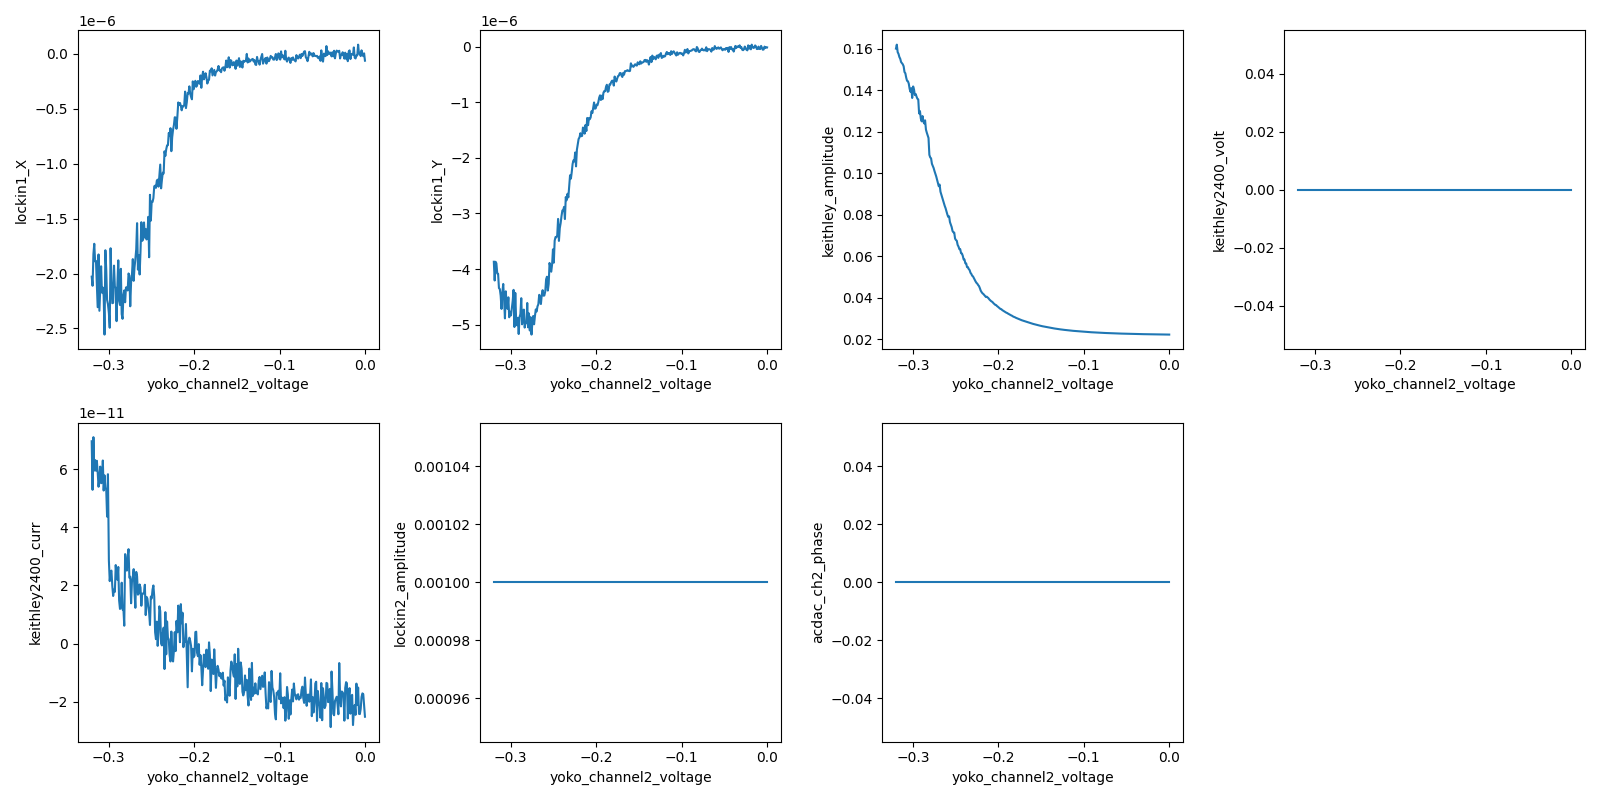

2025-05-12 11:13:19,700 [INFO] Completed in 0h 1m 39s
2025-05-12 11:13:19,700 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\1\data.tsv.gz


In [14]:
Crefamp(0.001) #applying 1mV on cref



dep = [Vdsx, Vdsy, VdsDC, Vgr, Igr, Crefamp, Crefphase]
indep = [Vg]

bias = sweep.Station(measurement_config={param.full_name: param.label for param in indep + dep}, basedir = BGBSO1_2)
for param in dep + indep:
    bias.fp(param)

for param in dep:
    bias.plot(Vg, param)

bias.add_comment("Bias sweep for BGBSO1_2")

bias.sweep(Vg, np.linspace(0,-0.4, 400), delay = 0.1)


In [18]:
Vg(-0.28)
Vref = (Crefamp, Crefphase)
Vdrive = (Deviceamp, Devicephase)
reference = None
frequency = acdac.frequency
int_time = 2

balance = Balancer(Vref, reference, Vdrive, li1, frequency, int_time)
DRIVE = 0.001
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

2 channel mode in use


In [19]:
paramp((Vdd, Vg, Deviceamp, Crefamp))

2025-05-13 16:30:13,079 [INFO] Starting sweep with ID 2
2025-05-13 16:30:13,083 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

2025-05-13 16:30:28,947 [WARNING] ID 2 INTERRUPTED


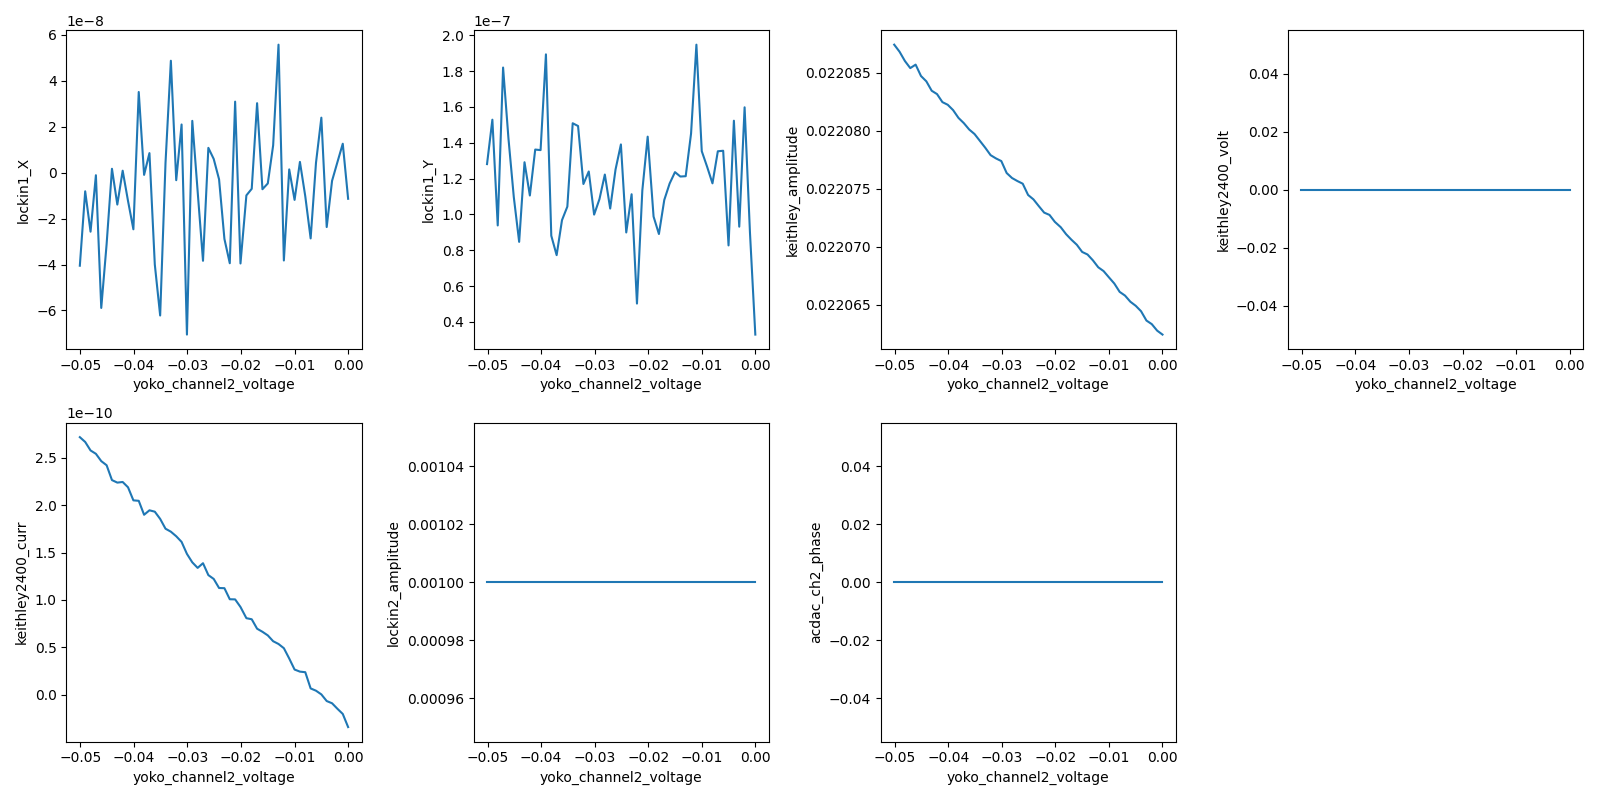

2025-05-13 16:30:29,530 [INFO] Completed in 0h 0m 15s
2025-05-13 16:30:29,530 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\2\data.tsv.gz


In [20]:
#Testing to see if Gr is shorted to TG at room temp
paramp(Vdd, 0.2)

Crefamp(0.001) #applying 1mV on cref



dep = [Vdsx, Vdsy, VdsDC, Vgr, Igr, Crefamp, Crefphase]
indep = [Vg]

bias = sweep.Station(measurement_config={param.full_name: param.label for param in indep + dep}, basedir = BGBSO1_2)
for param in dep + indep:
    bias.fp(param)

for param in dep:
    bias.plot(Vg, param)

bias.add_comment("Bias sweep for BGBSO1_2")

bias.sweep(Vg, np.linspace(0,-0.4, 400), delay = 0.1)



In [21]:
paramp((Vdd, Vg, Deviceamp, Crefamp))

#definitely shorted too bad

In [ ]:
#Fixed the short, measuring now on may 26th 2025

2025-05-26 13:55:03,284 [INFO] Starting sweep with ID 3
2025-05-26 13:55:03,293 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

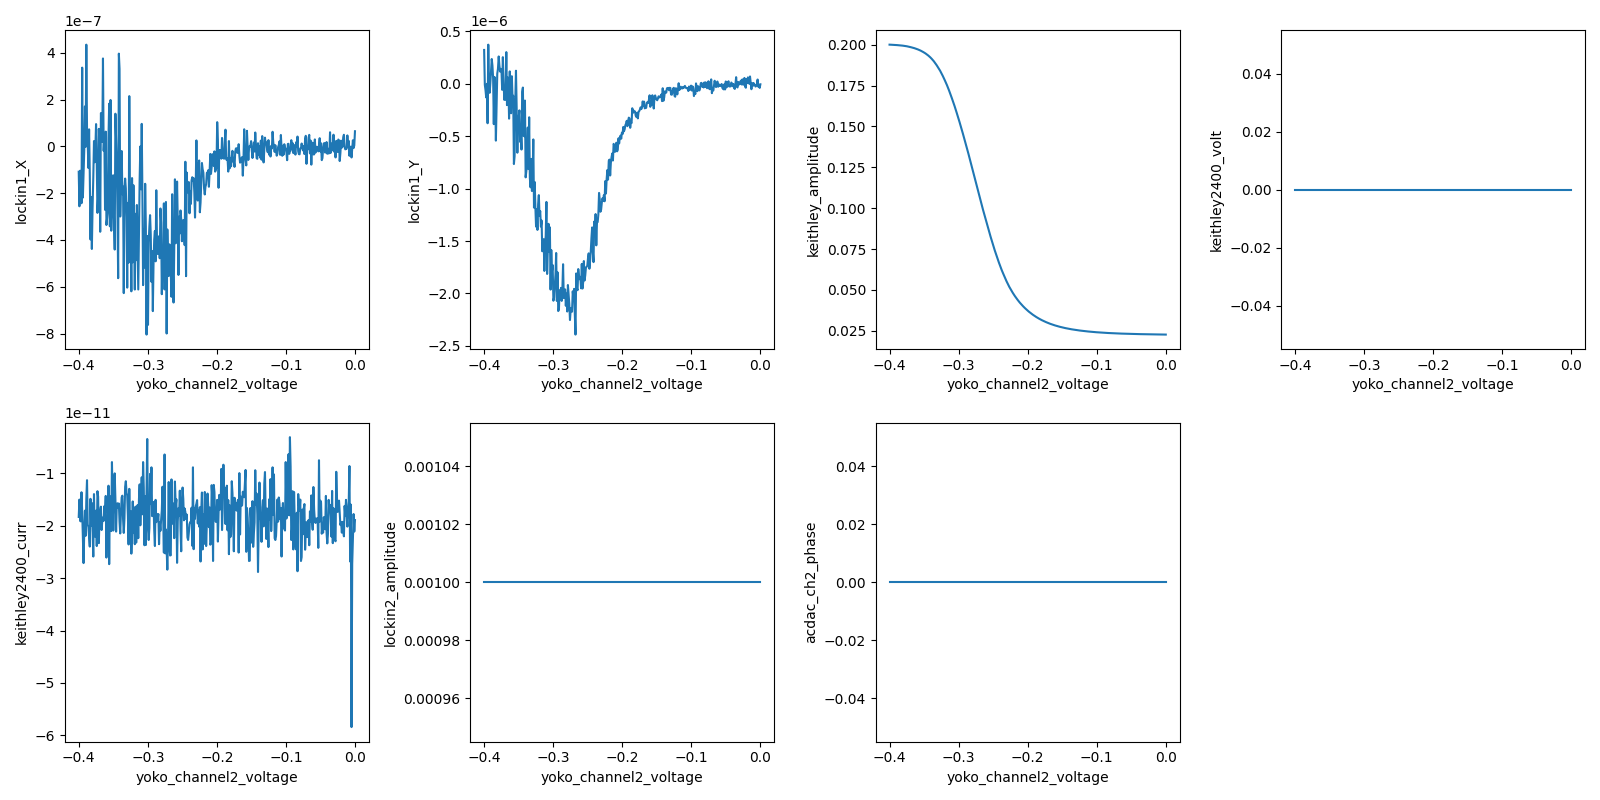

2025-05-26 13:57:07,776 [INFO] Completed in 0h 2m 3s
2025-05-26 13:57:07,776 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\3\data.tsv.gz


In [7]:
Crefamp(0.001) #applying 1mV on cref
paramp(Vdd, 0.2)


dep = [Vdsx, Vdsy, VdsDC, Vgr, Igr, Crefamp, Crefphase]
indep = [Vg]

bias = sweep.Station(measurement_config={param.full_name: param.label for param in indep + dep}, basedir = BGBSO1_2)
for param in dep + indep:
    bias.fp(param)

for param in dep:
    bias.plot(Vg, param)

bias.add_comment("Bias sweep for BGBSO1_2")

bias.sweep(Vg, np.linspace(0,-0.4, 400), delay = 0.1)

In [ ]:
#by feel, the HEMT is biased at -0.270V. Things are looking good

Vg(-0.27)
Vref = (Crefamp, Crefphase)
Vdrive = (Deviceamp, Devicephase)
reference = None
frequency = acdac.frequency
int_time = 2

balance = Balancer(Vref, reference, Vdrive, li1, frequency, int_time)
DRIVE = 0.005
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

#gain on device is ~10% while gain on Cref is ~1%. I don't know what the difference is. 

2 channel mode in use


In [10]:
INIT = (0.01,0.01)
DELTA = (0.01,0.01)
NULL = True
Cstand = 1

balance.balanceconfig(INIT, DELTA, NULL, Cstand)
balance.balance()
balance.calculate_capacitance()

Kr1, Kr2 = (np.float64(0.0020904661141), np.float64(-0.0004888995249499999))
Kc1, Kc2 = (np.float64(0.0005021562174), np.float64(0.0020725005014900003))
P = 0.9463730558484413


np.float64(4.440623837915558)

In [11]:
#setting up the capacitance variable
from cappy.balancer import Capacitance, Conductance

cap = Capacitance(balance)
cap.capconfig(offbal = True, rebal = False)
cap()
sleep(0.3)
cond = Conductance(balance)
cond.conconfig(offbal = True, rebal = False)
cond()

np.float64(101241.27903896914)

In [12]:
cap()

np.float64(4.524194942907598)

In [ ]:
#things are all setup, now time to sweep graphene voltage to change the density. 

2025-05-26 14:19:54,538 [INFO] Starting sweep with ID 4
2025-05-26 14:19:54,539 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

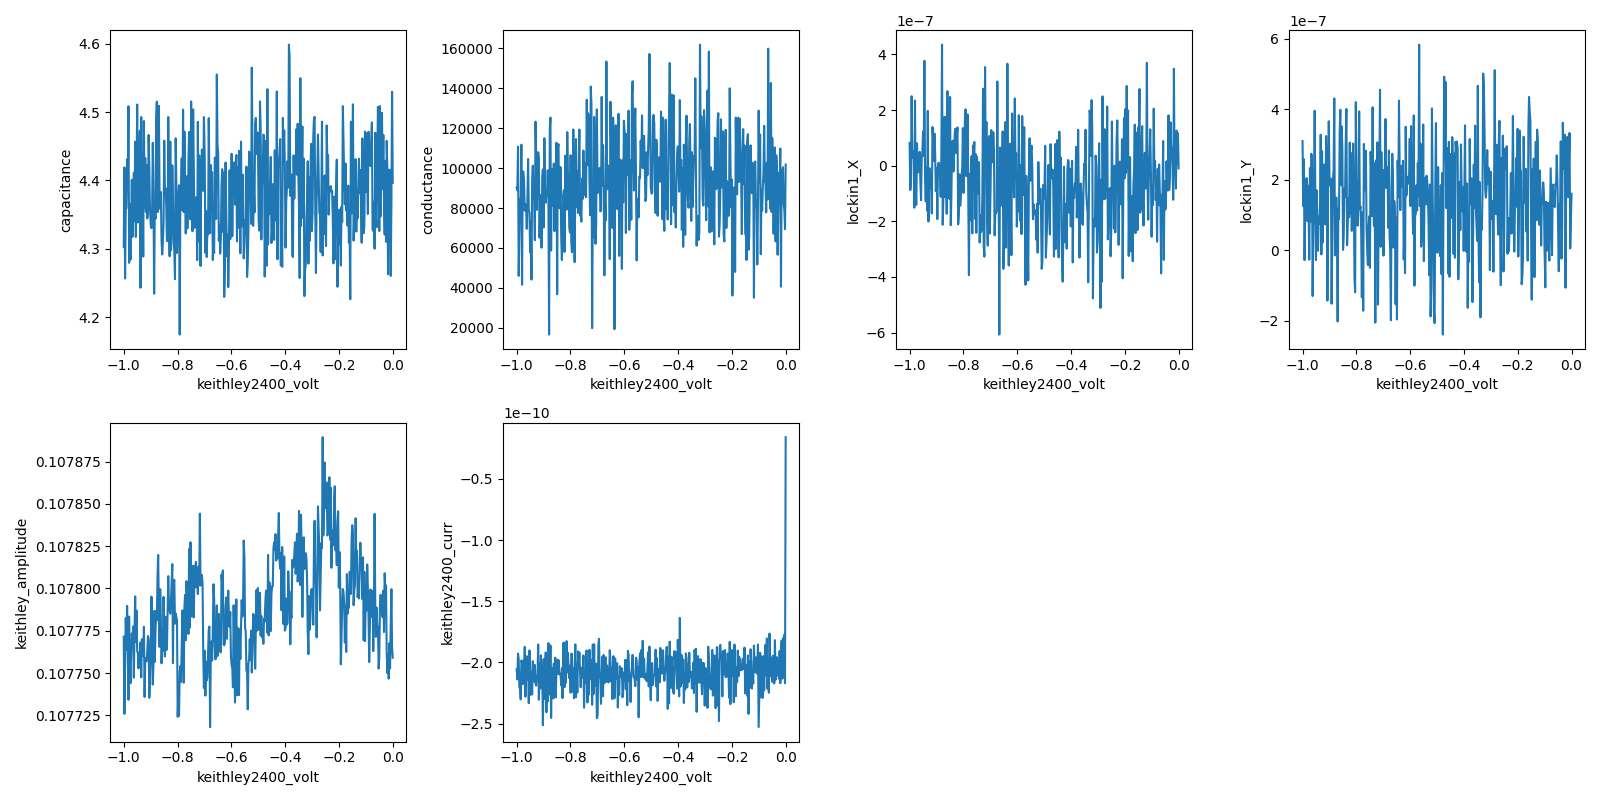

2025-05-26 14:22:28,851 [INFO] Completed in 0h 2m 33s
2025-05-26 14:22:28,851 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\4\data.tsv.gz


In [14]:
dep = [cap, cond, Vdsx, Vdsy, VdsDC, Igr]
indep = [Vgr]

densweep = sweep.Station( basedir = BGBSO1_2)

for param in dep + indep:
    densweep.fp(param)

for param in dep:
    densweep.plot(Vgr, param)

densweep.add_comment("Density sweep for BGBSO1_2")

#sweeping to -1V, going to tip toe and watch current
densweep.sweep(Vgr, np.linspace(0, -1, 400), delay = 0.1)

In [15]:
#Need to increase the excitation voltage to increase signal to noise
DRIVE = 0.005
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()

Kr1, Kr2 = (np.float64(0.0021045286303), np.float64(-0.0005155101463))
Kc1, Kc2 = (np.float64(0.0005258340935), np.float64(0.00210680946107))
P = 0.9423851676740412


np.float64(4.327683090892425)

2025-05-26 14:24:53,637 [INFO] Starting sweep with ID 5
2025-05-26 14:24:53,638 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

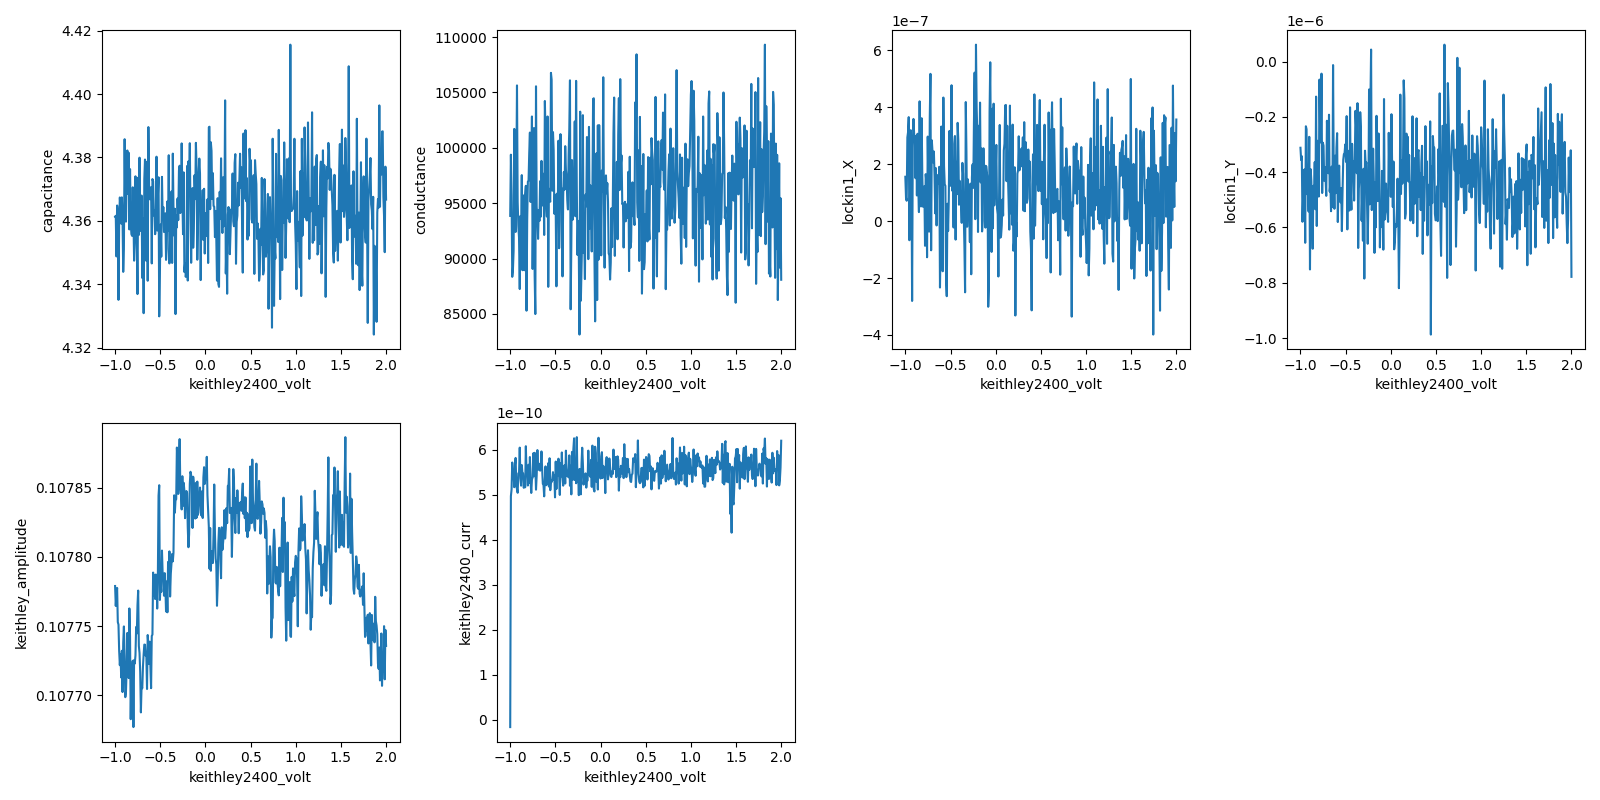

2025-05-26 14:27:28,003 [INFO] Completed in 0h 2m 33s
2025-05-26 14:27:28,003 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\5\data.tsv.gz


In [17]:
densweep.sweep(Vgr, np.linspace(-1, 2, 400), delay = 0.1)

Kr1, Kr2 = (np.float64(0.00210142177368), np.float64(-0.0005211171810000012))
Kc1, Kc2 = (np.float64(0.00051447475471), np.float64(0.0020994633814999993))
P = 0.9427128327507669
2025-05-26 14:29:38,651 [INFO] Starting sweep with ID 6
2025-05-26 14:29:38,651 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

2025-05-26 14:30:00,971 [WARNING] ID 6 INTERRUPTED


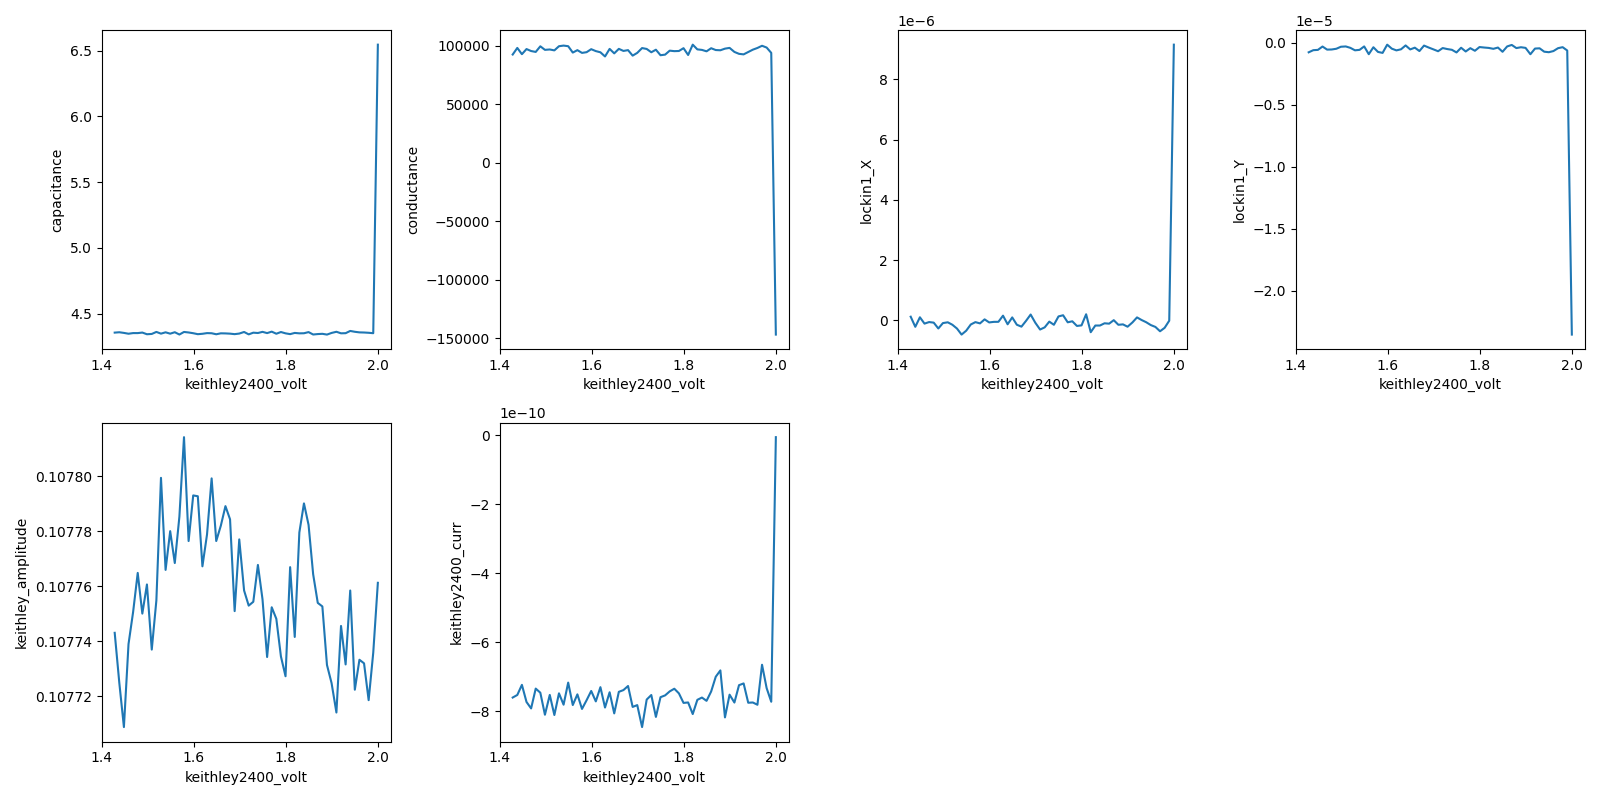

2025-05-26 14:30:01,341 [INFO] Completed in 0h 0m 22s
2025-05-26 14:30:01,351 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\6\data.tsv.gz


In [18]:
DRIVE = 0.01
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()

densweep.sweep(Vgr, np.linspace(2,-2,400), delay = 0.1)

2025-05-26 14:30:30,285 [INFO] Starting sweep with ID 7
2025-05-26 14:30:30,294 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

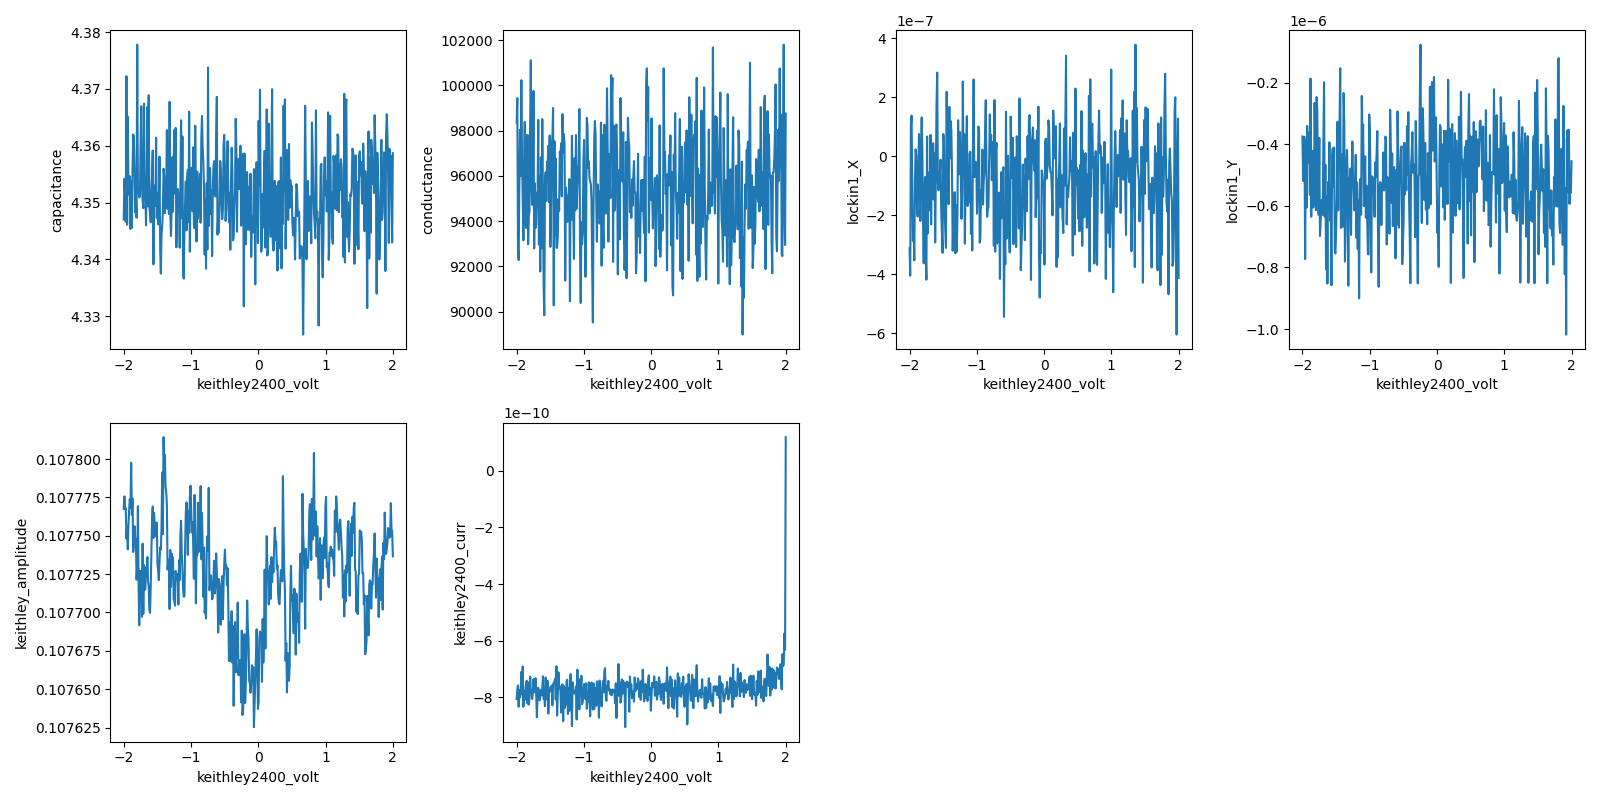

2025-05-26 14:33:05,017 [INFO] Completed in 0h 2m 34s
2025-05-26 14:33:05,020 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\7\data.tsv.gz


In [19]:
densweep.reset()
paramp(Vgr, 2)
densweep.sweep(Vgr, np.linspace(2,-2,400), delay = 0.1)

2025-05-26 14:38:19,221 [INFO] Starting watch with ID 9
2025-05-26 15:03:54,175 [WARNING] ID 9 INTERRUPTED


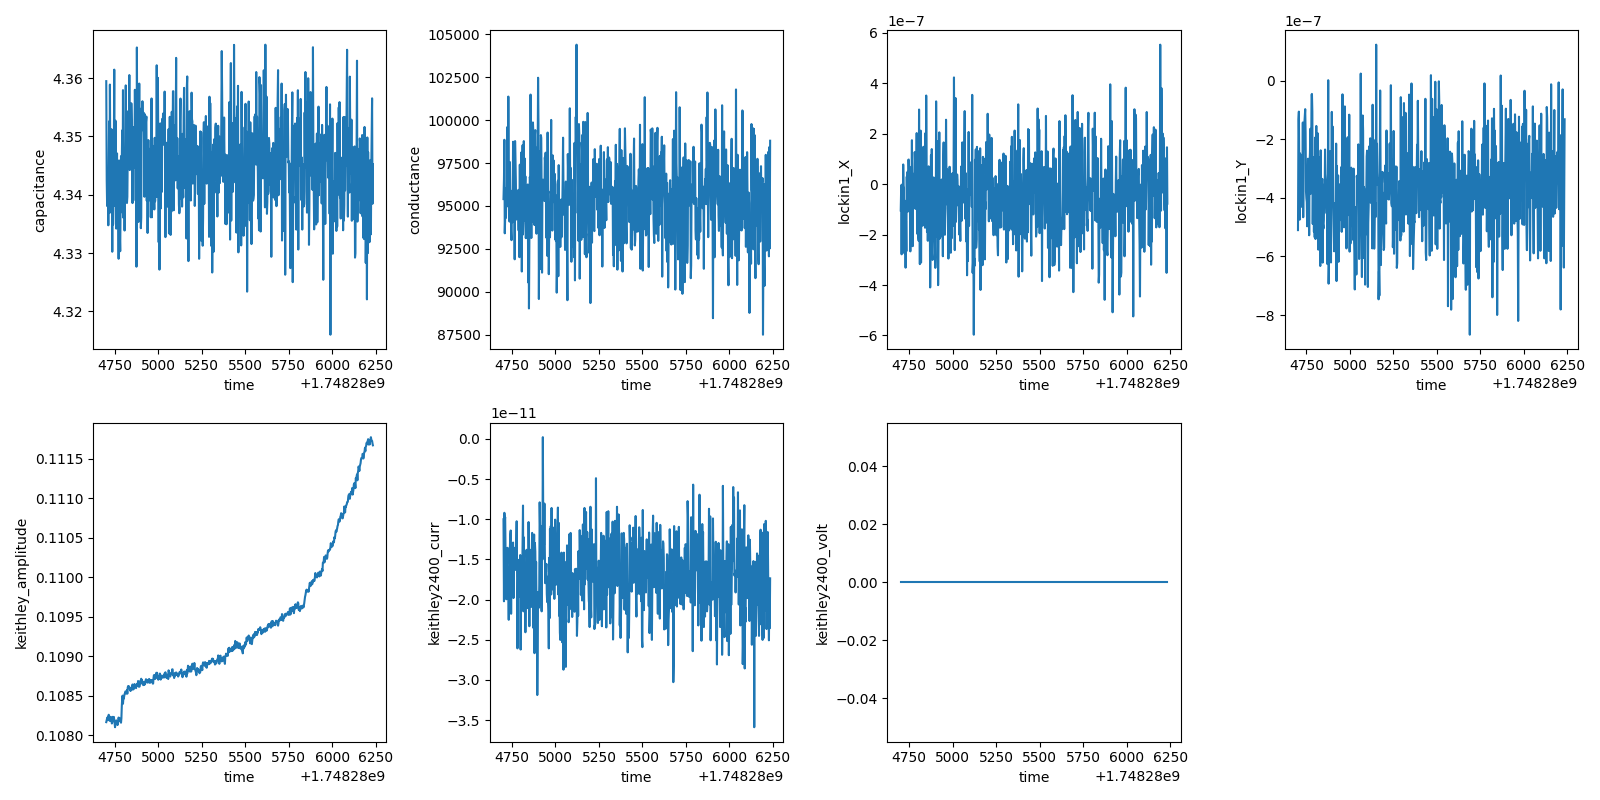

2025-05-26 15:03:54,672 [INFO] Completed in 0h 25m 34s
2025-05-26 15:03:54,672 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\9\data.tsv.gz


In [23]:
paramp(Vgr)
#going to 9 T. 

densweep.reset()

fieldramp = sweep.Station(basedir = BGBSO1_2)

for param in dep + indep:
    fieldramp.fp(param)
    fieldramp.plot('time', param)

fieldramp.add_comment("Field ramp for BGBSO1_2")

fieldramp.watch(delay = 2)

2025-05-26 15:09:25,173 [INFO] Starting sweep with ID 11
2025-05-26 15:09:25,173 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

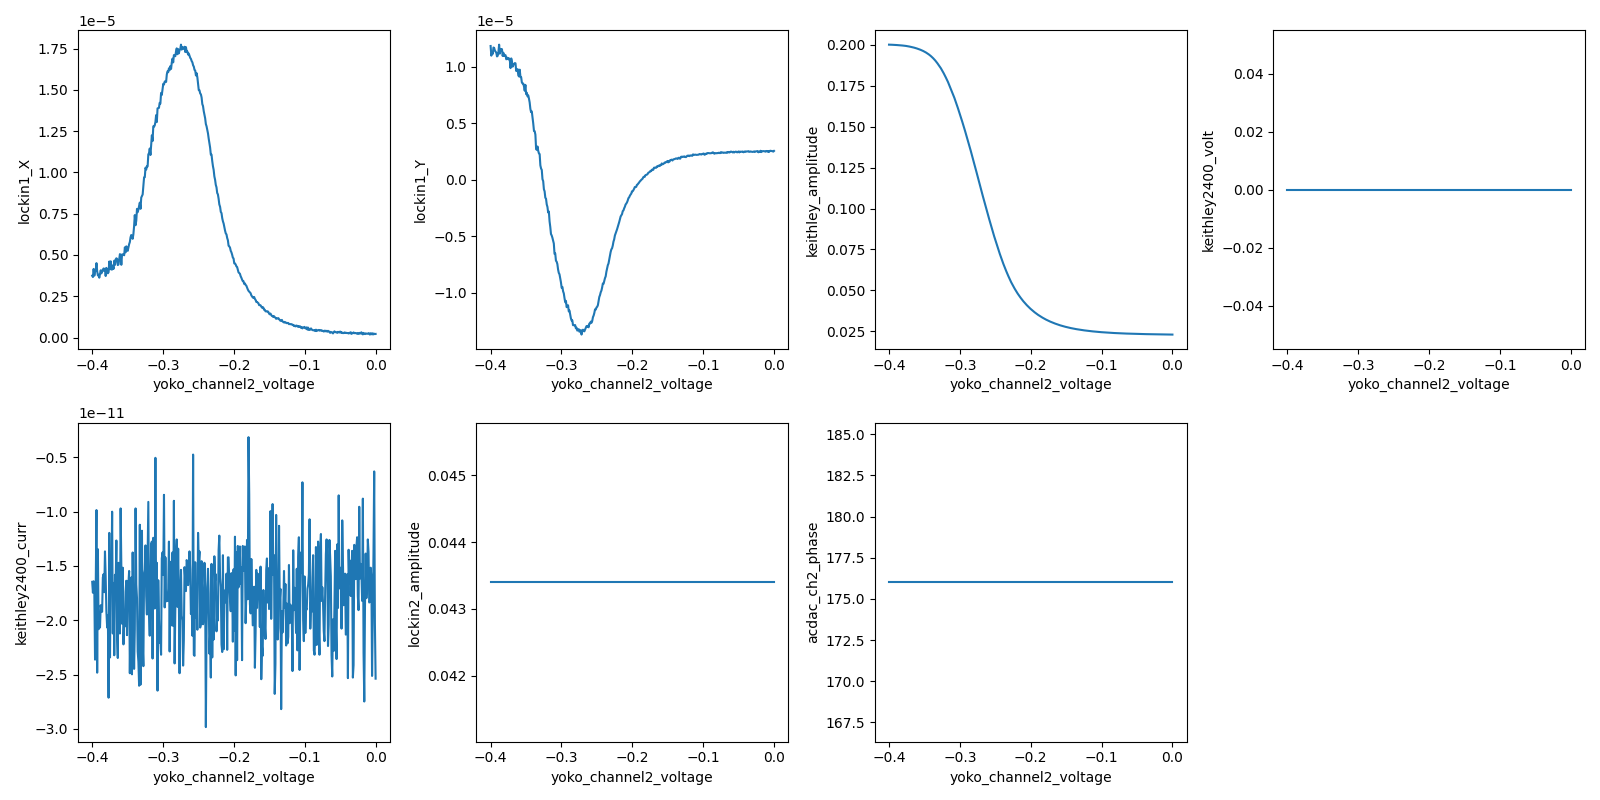

2025-05-26 15:11:30,688 [INFO] Completed in 0h 2m 4s
2025-05-26 15:11:30,688 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\11\data.tsv.gz


In [26]:
bias.reset()
bias.sweep(Vg, np.linspace(0,-0.4, 400), delay = 0.1)

In [ ]:
#realized that I had forgotten to install a low pass filter on Vg. Signal should be much larger now. Bias at -0.268V
Vg(-0.268)
DRIVE = 0.005
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()

Kr1, Kr2 = (np.float64(0.0017708907762), np.float64(-0.0009328272427000002))
Kc1, Kc2 = (np.float64(0.0009783268979), np.float64(0.0018069798897999995))
P = 0.7780927511268267


np.float64(4.515179746008255)

2025-05-26 15:15:54,531 [INFO] Starting sweep with ID 12
2025-05-26 15:15:54,533 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

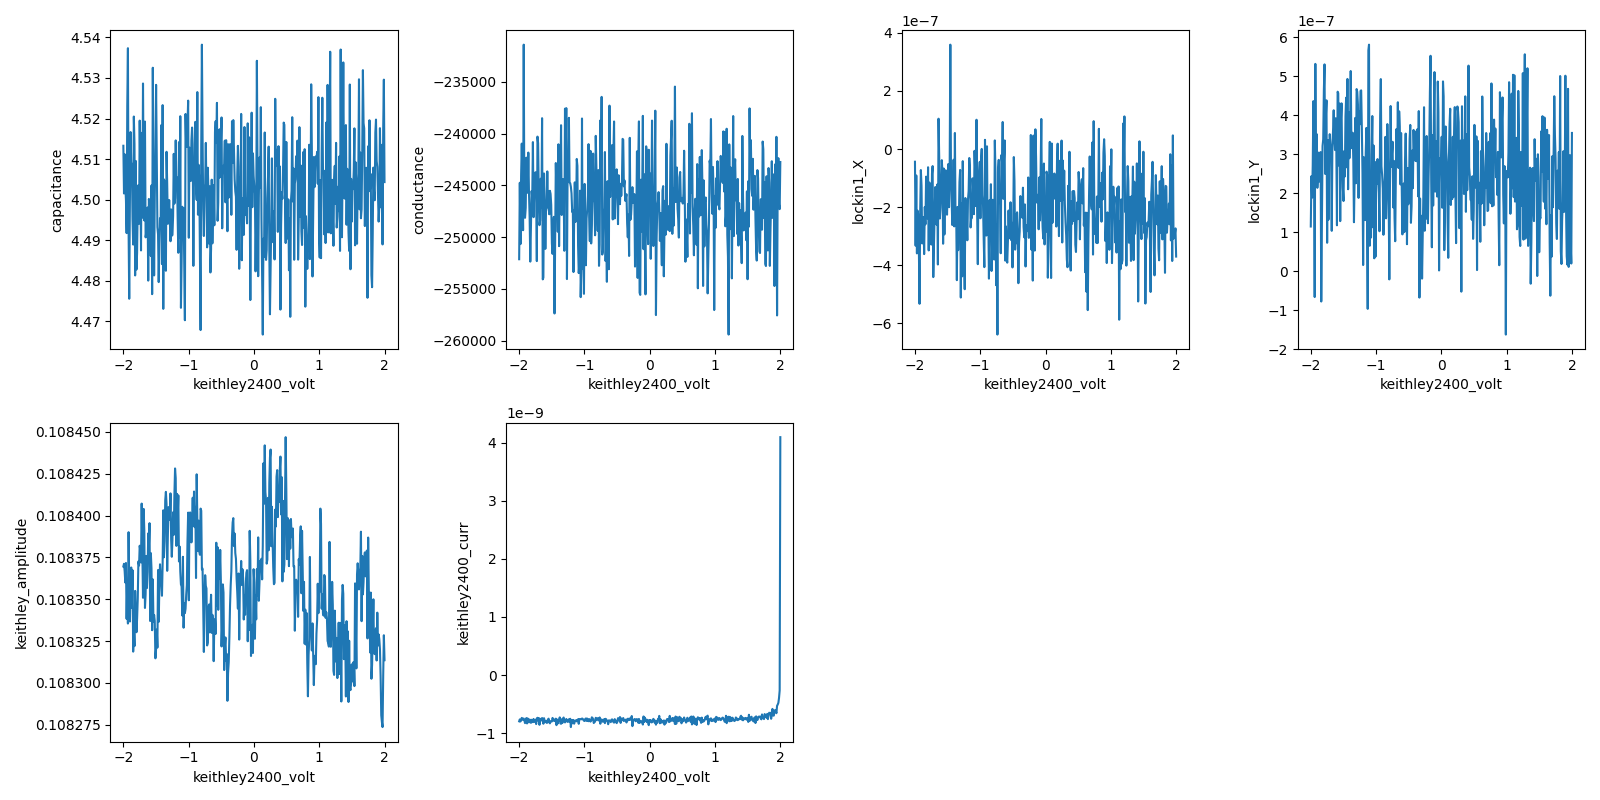

2025-05-26 15:18:28,535 [INFO] Completed in 0h 2m 33s
2025-05-26 15:18:28,535 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\12\data.tsv.gz


In [30]:
densweep.reset()
paramp(Vgr, 2)
densweep.sweep(Vgr, np.linspace(2,-2,400), delay = 0.1)

2025-05-26 15:19:05,055 [INFO] Starting sweep with ID 13
2025-05-26 15:19:05,056 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

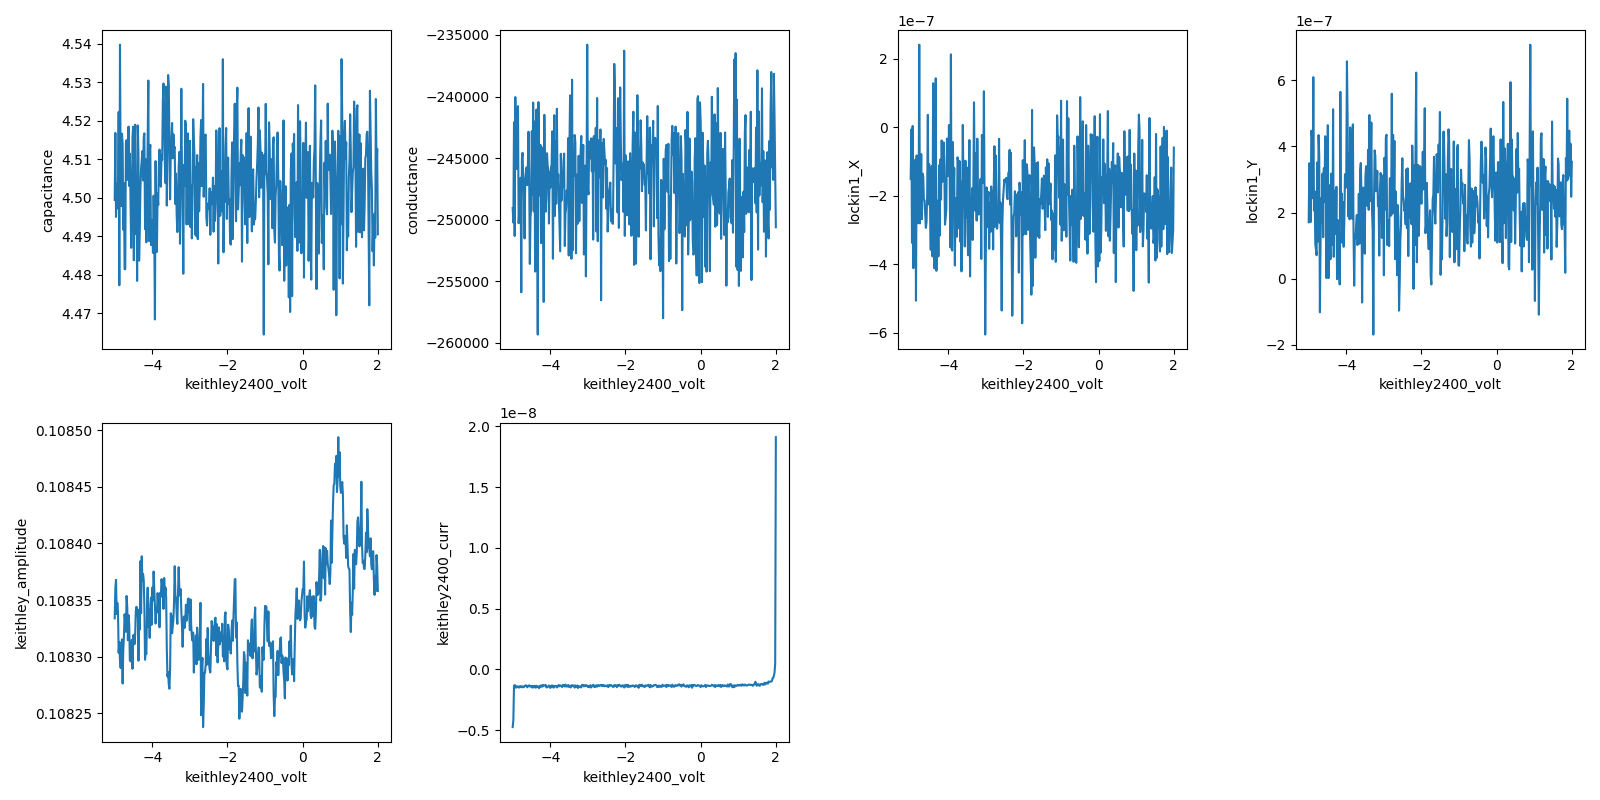

2025-05-26 15:21:39,660 [INFO] Completed in 0h 2m 34s
2025-05-26 15:21:39,662 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\13\data.tsv.gz


In [31]:
densweep.sweep(Vgr, np.linspace(2,-5,400), delay = 0.1)

Kr1, Kr2 = (np.float64(0.0018153700921200002), np.float64(-0.0009743249393000003))
Kc1, Kc2 = (np.float64(0.0010118377531399998), np.float64(0.0017765953089000006))
P = 0.7658869260367097
2025-05-26 15:22:10,862 [INFO] Starting sweep with ID 14
2025-05-26 15:22:10,862 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

2025-05-26 15:24:17,958 [WARNING] ID 14 INTERRUPTED


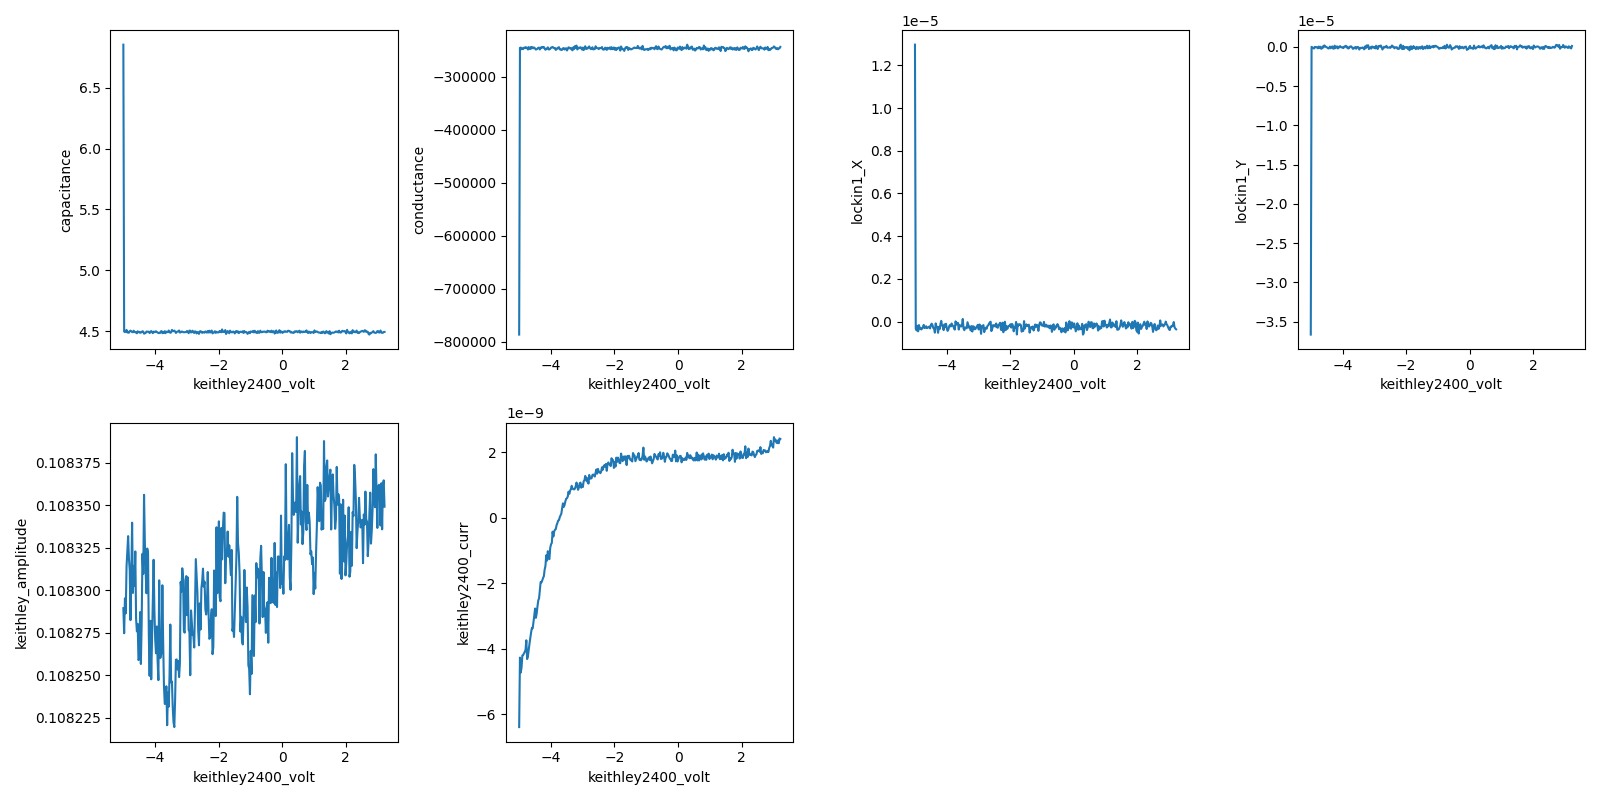

2025-05-26 15:24:18,427 [INFO] Completed in 0h 2m 7s
2025-05-26 15:24:18,428 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\14\data.tsv.gz


In [32]:
DRIVE = 0.01
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()

densweep.sweep(Vgr, np.linspace(-5,5,400), delay = 0.1)

In [37]:
#Had wrong connection on the graphene. I had it on 3, when it should have been 4

DRIVE = 0.001
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()


Kr1, Kr2 = (np.float64(0.004663271825000007), np.float64(-0.002407317514999997))
Kc1, Kc2 = (np.float64(0.0024355016600000013), np.float64(0.004659345723))
P = 0.7875008608449029


np.float64(46.8453646658127)

2025-05-26 15:48:13,761 [INFO] Starting sweep with ID 15
2025-05-26 15:48:13,761 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

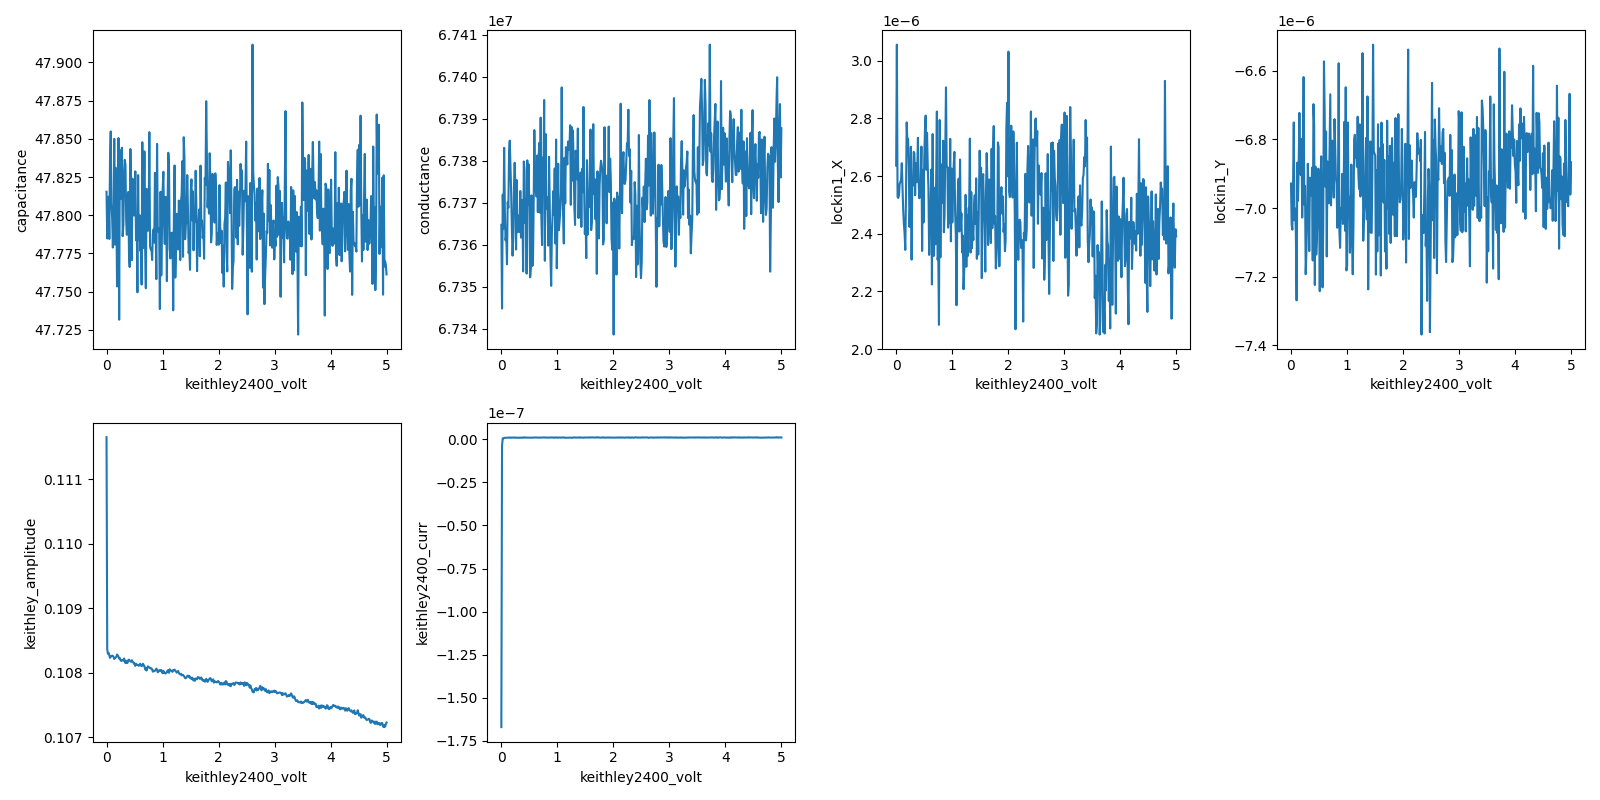

2025-05-26 15:50:48,696 [INFO] Completed in 0h 2m 34s
2025-05-26 15:50:48,696 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\15\data.tsv.gz


In [38]:
densweep.reset()
paramp(Vgr, 2)
densweep.sweep(Vgr, np.linspace(0,5,400), delay = 0.1)

Kr1, Kr2 = (np.float64(0.004689861089999994), np.float64(-0.002431089529999998))
Kc1, Kc2 = (np.float64(0.0024975743199999803), np.float64(0.004610663739999994))
P = 0.7807624807364243
2025-05-26 15:52:01,523 [INFO] Starting sweep with ID 16
2025-05-26 15:52:01,523 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

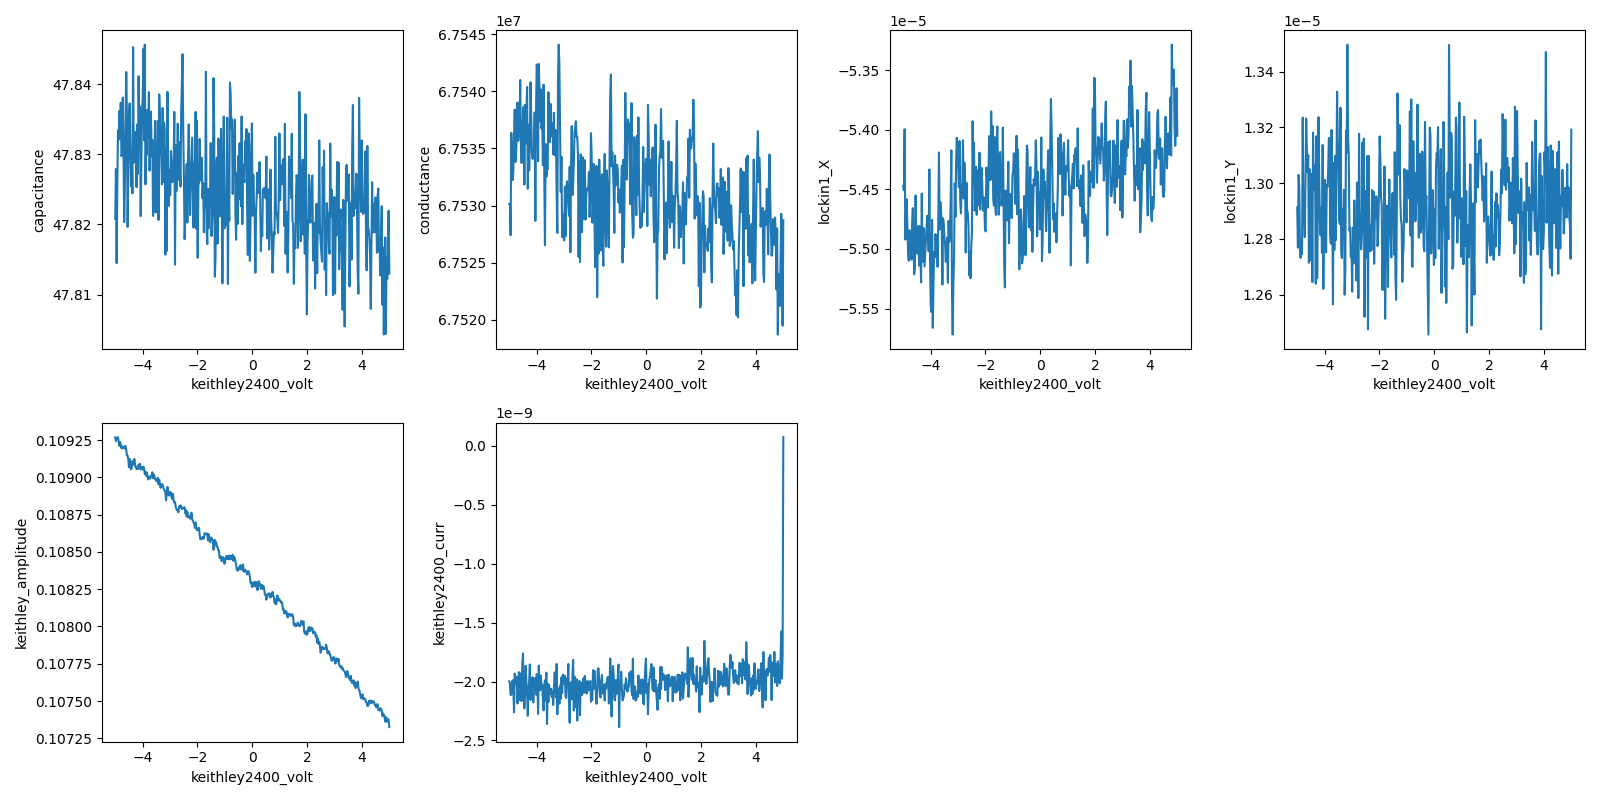

2025-05-26 15:54:35,944 [INFO] Completed in 0h 2m 33s
2025-05-26 15:54:35,944 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\16\data.tsv.gz


In [40]:
DRIVE = 0.005
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()
sleep(2)
densweep.sweep(Vgr, np.linspace(5,-5,400), delay = 0.1)

2025-05-26 15:55:22,244 [INFO] Starting sweep with ID 17
2025-05-26 15:55:22,247 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

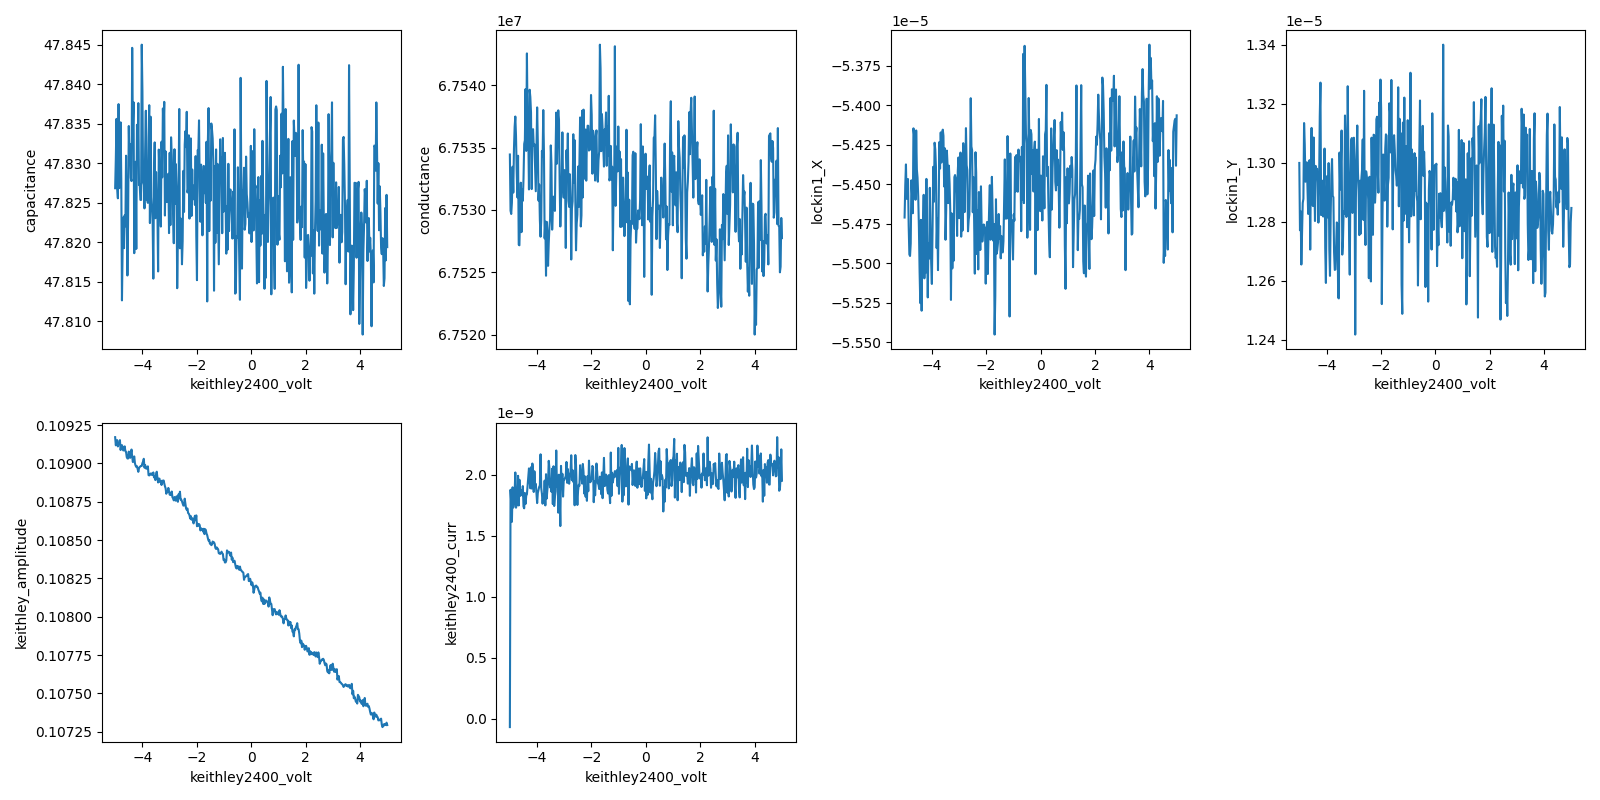

2025-05-26 15:57:56,856 [INFO] Completed in 0h 2m 34s
2025-05-26 15:57:56,856 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\17\data.tsv.gz


In [41]:
densweep.sweep(Vgr, np.linspace(-5,5,400), delay = 0.1)

Kr1, Kr2 = (np.float64(0.004654936489999987), np.float64(-0.0024168286479999963))
Kc1, Kc2 = (np.float64(0.002464605499999991), np.float64(0.004692137007999996))
P = 0.7857219387505721
2025-05-26 15:59:31,785 [INFO] Starting sweep with ID 18
2025-05-26 15:59:31,785 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

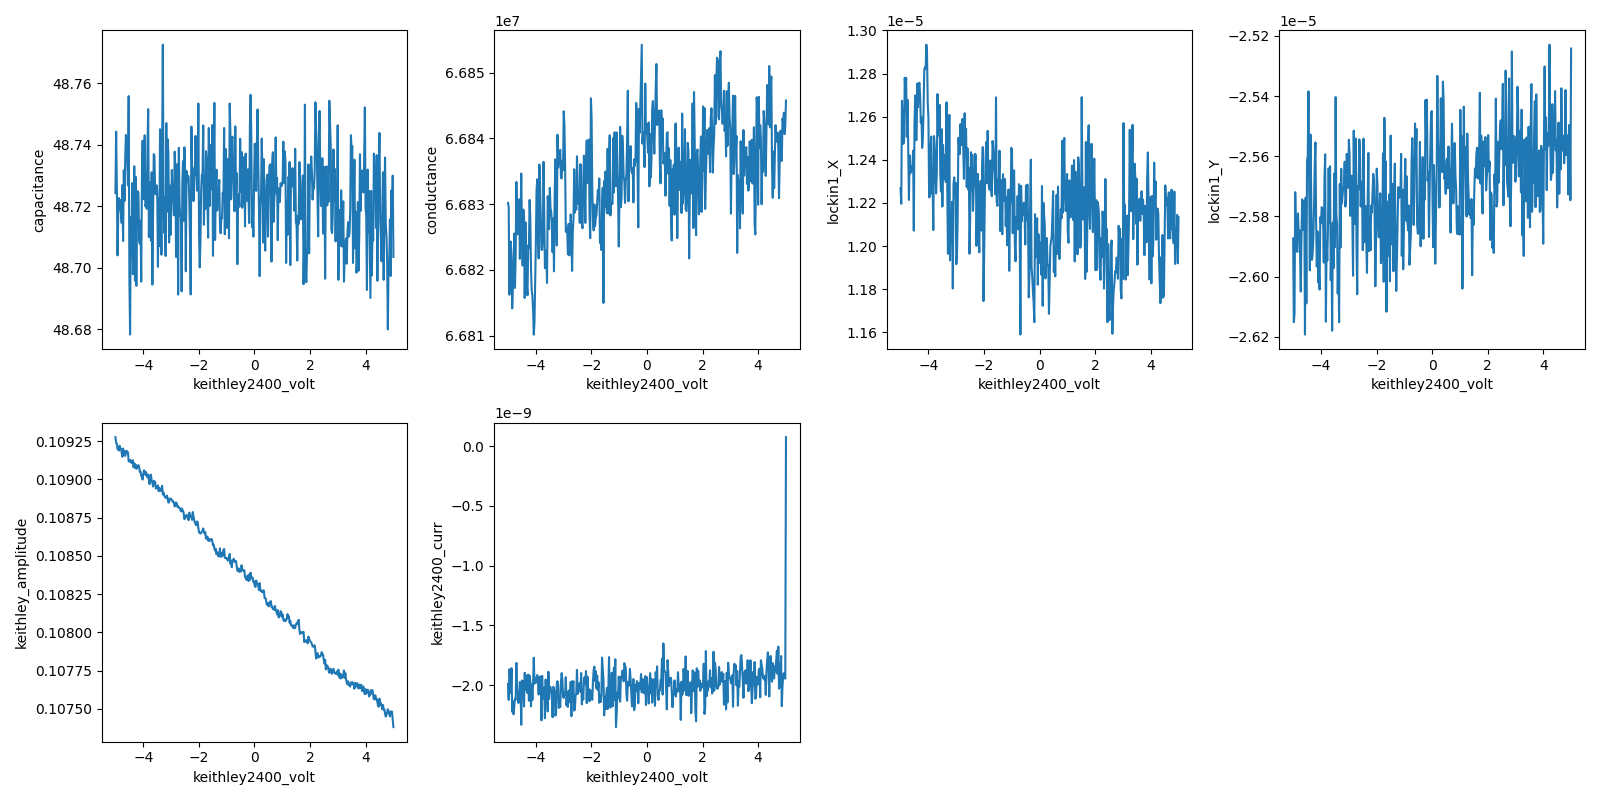

2025-05-26 16:02:06,348 [INFO] Completed in 0h 2m 34s
2025-05-26 16:02:06,348 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\18\data.tsv.gz


In [42]:
DRIVE = 0.002
FREQ = 50777
balance.excite(DRIVE, 0, FREQ)

balance.balance()
balance.calculate_capacitance()
sleep(2)
densweep.sweep(Vgr, np.linspace(5,-5,400), delay = 0.1)

2025-05-26 16:03:12,583 [INFO] Starting sweep with ID 19
2025-05-26 16:03:12,585 [INFO] Minimum duration 0h 0m 40s


  0%|          | 0/400 [00:00<?, ?it/s]

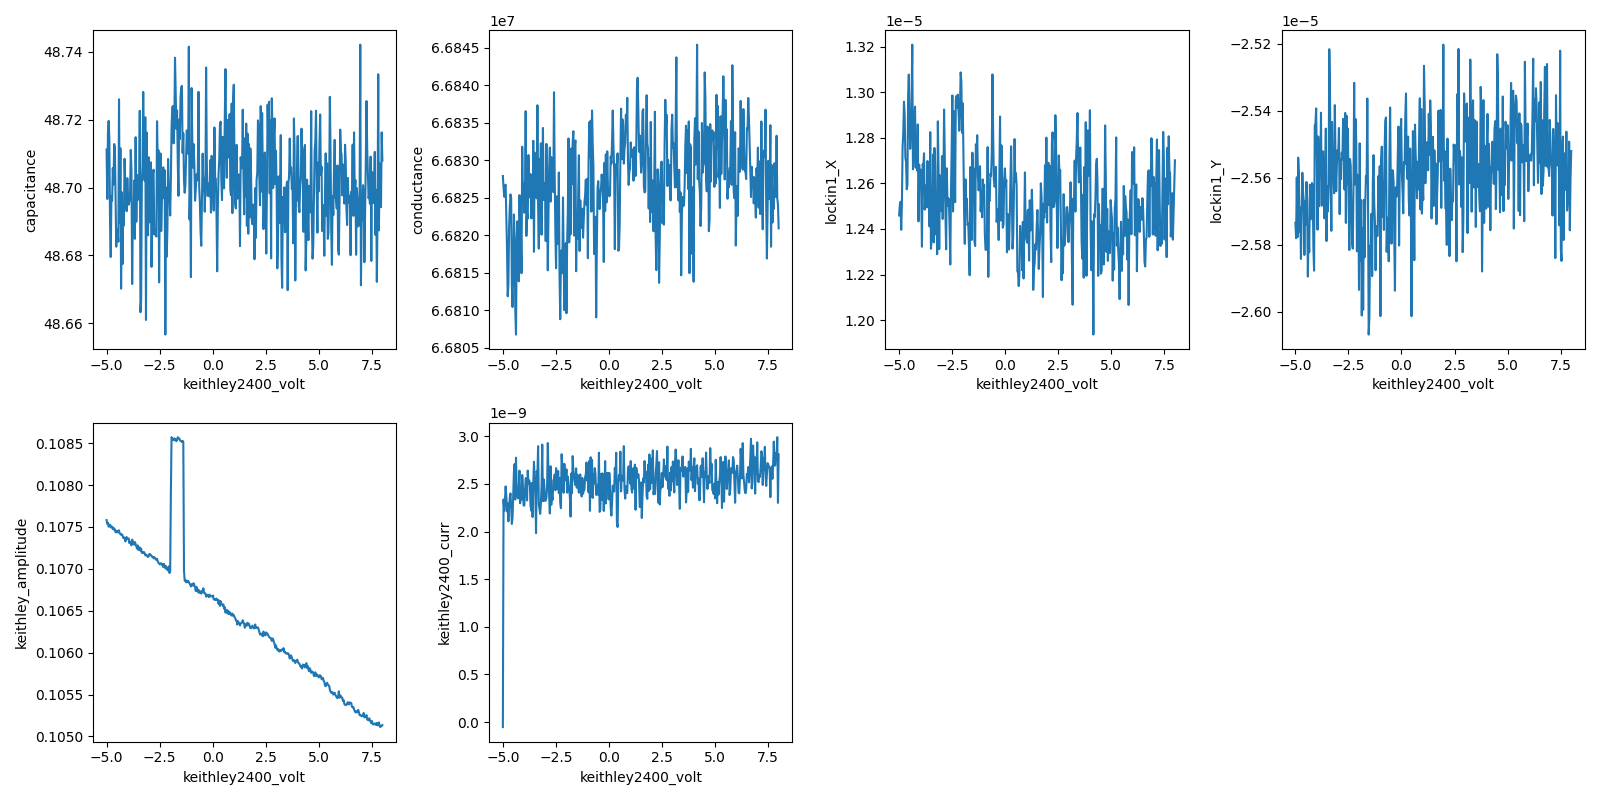

2025-05-26 16:05:48,078 [INFO] Completed in 0h 2m 34s
2025-05-26 16:05:48,078 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\19\data.tsv.gz


In [43]:
densweep.sweep(Vgr, np.linspace(-5,8,400), delay = 0.1)

2025-05-26 16:16:19,256 [INFO] Starting sweep with ID 20
2025-05-26 16:16:19,256 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

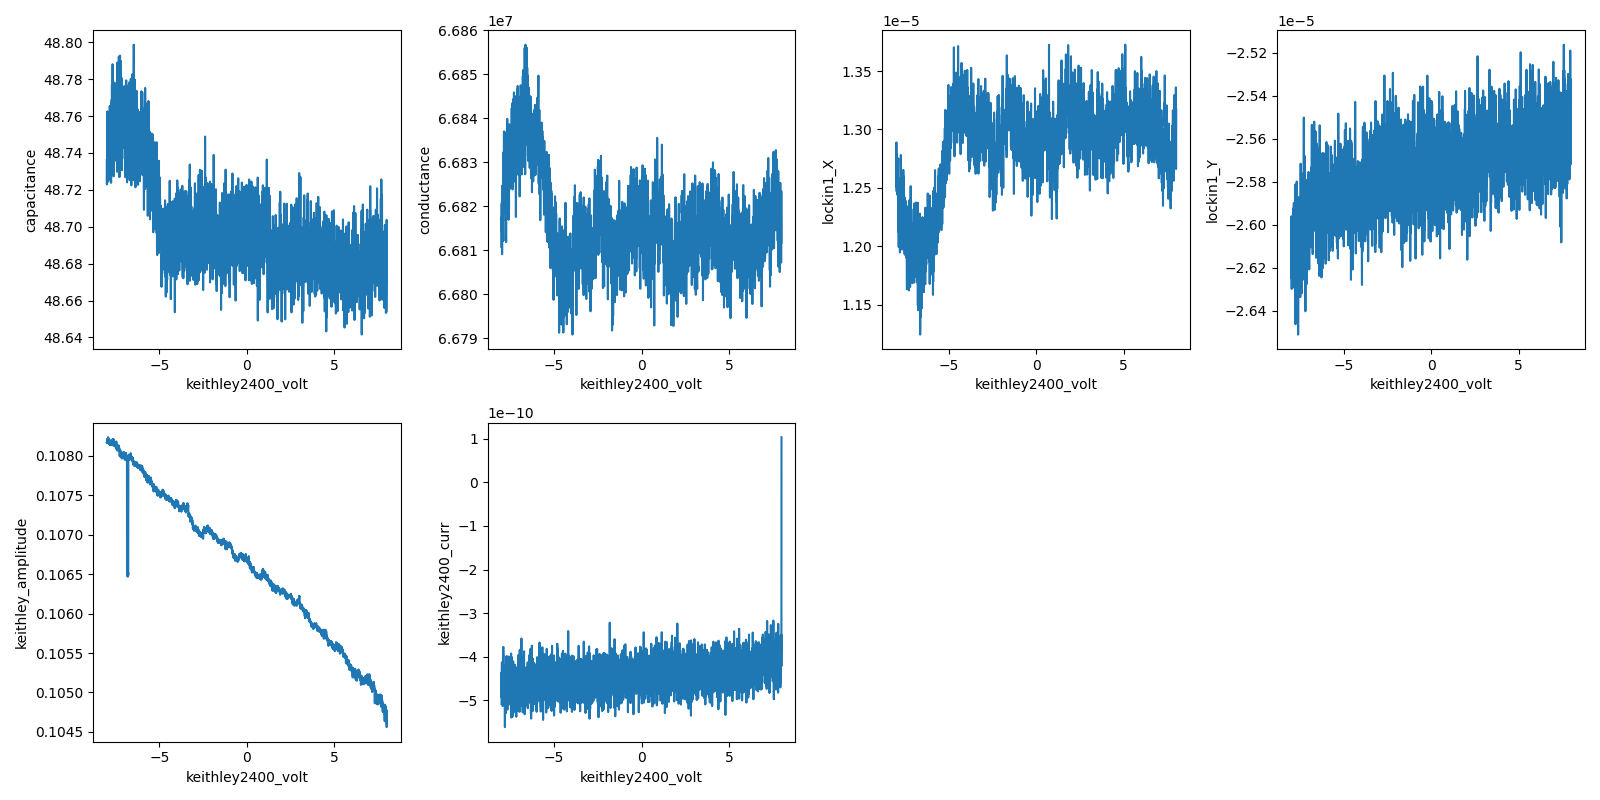

2025-05-26 16:35:44,995 [INFO] Completed in 0h 19m 25s
2025-05-26 16:35:44,995 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\20\data.tsv.gz


In [44]:
densweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)

In [3]:
from cappy.opener import Opener
opened = Opener(BGBSO1_2, 20)
data = opened.getdata()
capdata = data["capacitance"]
condata = data["conductance"]
Vgrdata = data["keithley2400_volt"]

avgwindow = 20

for i in range(avgwindow, len(capdata)-avgwindow):
    capdata[i] = np.mean(capdata[i-avgwindow:i+avgwindow])
    condata[i] = np.mean(condata[i-avgwindow:i+avgwindow])

import matplotlib.pyplot as plt

# plt.plot(Vgrdata[avgwindow:-avgwindow], capdata[avgwindow:-avgwindow])
# plt.xlabel("Gate Voltage (V)")
# plt.ylabel("Capacitance (F)")
# plt.show()

plt.plot(Vgrdata[avgwindow:-avgwindow], capdata[avgwindow:-avgwindow],label = 'Run 1')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (S)")


opened = Opener(BGBSO1_2, 21)
data = opened.getdata()
capdata = data["capacitance"]
condata = data["conductance"]
Vgrdata = data["keithley2400_volt"]

avgwindow = 20

for i in range(avgwindow, len(capdata)-avgwindow):
    capdata[i] = np.mean(capdata[i-avgwindow:i+avgwindow])
    condata[i] = np.mean(condata[i-avgwindow:i+avgwindow])

plt.plot(Vgrdata[avgwindow:-avgwindow], capdata[avgwindow:-avgwindow], label = 'Run 2')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (S)")

plt.show()



C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 20

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])

C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 21

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])


2025-05-26 16:45:43,479 [INFO] Starting sweep with ID 21
2025-05-26 16:45:43,479 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

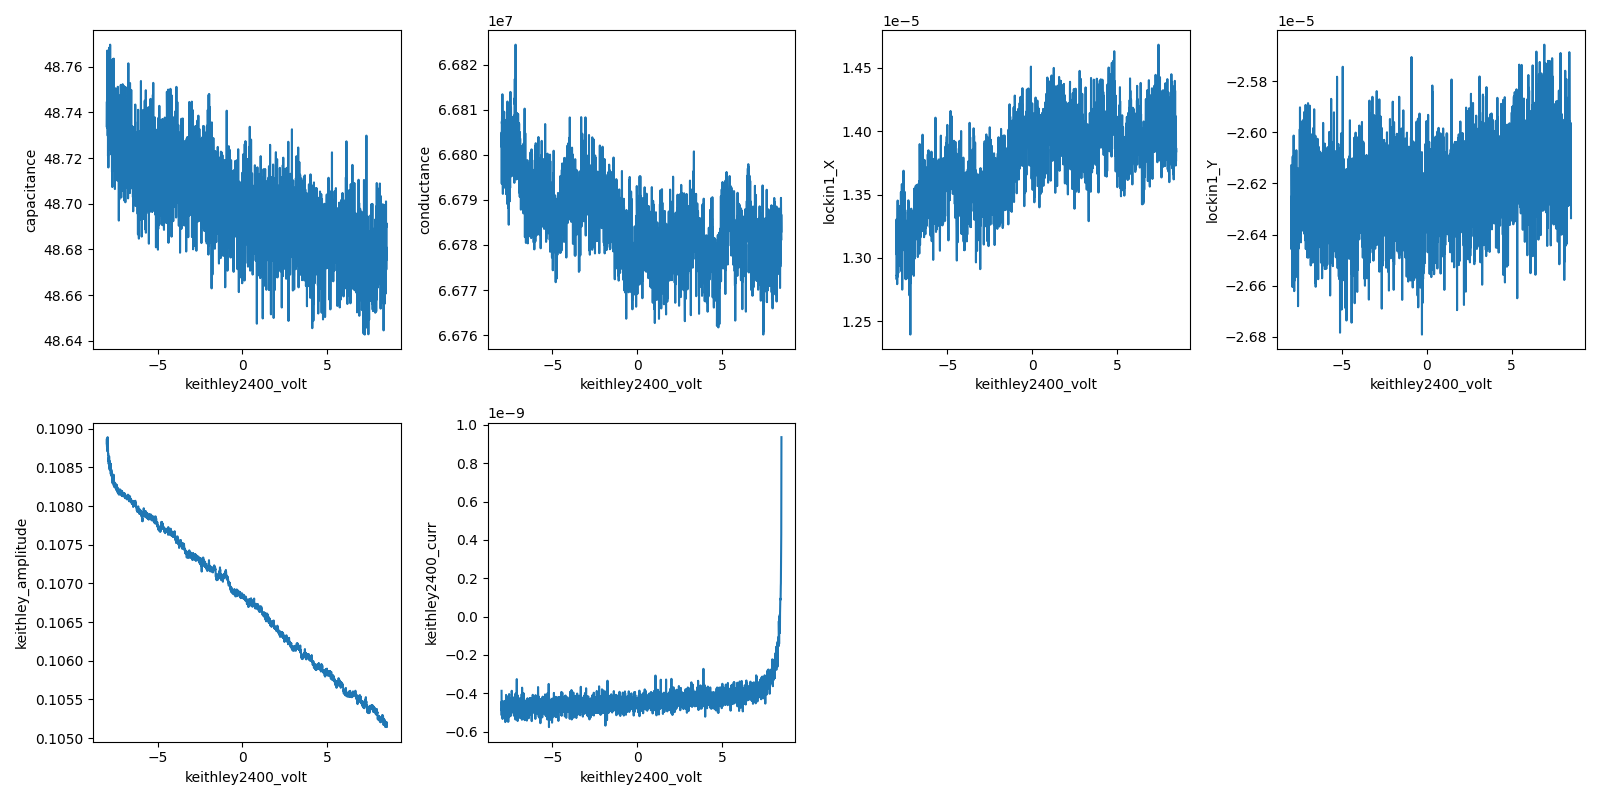

2025-05-26 17:05:12,524 [INFO] Completed in 0h 19m 28s
2025-05-26 17:05:12,524 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\21\data.tsv.gz


In [54]:
paramp(Vgr, 8.5,300)

sleep(1)

densweep.sweep(Vgr, np.linspace(8.5,-8,3000), delay = 0.1)

In [56]:
opened = Opener(BGBSO1_2, 21)
data = opened.getdata()
capdata = data["capacitance"]
condata = data["conductance"]
Vgrdata = data["keithley2400_volt"]

for i in range(avgwindow, len(capdata)-avgwindow):
    capdata[i] = np.mean(capdata[i-avgwindow:i+avgwindow])
    condata[i] = np.mean(condata[i-avgwindow:i+avgwindow])



plt.plot(Vgrdata[avgwindow:-avgwindow], capdata[avgwindow:-avgwindow])
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Capacitance (F)")
plt.show()

plt.plot(Vgrdata[avgwindow:-avgwindow], condata[avgwindow:-avgwindow])
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (S)")
plt.show()


C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 21

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])


In [57]:
paramp(Vgr)

In [131]:
bfield = li1.aux_in0


2025-05-26 17:50:46,905 [INFO] Starting watch with ID 22
2025-05-26 18:02:21,592 [WARNING] ID 22 INTERRUPTED


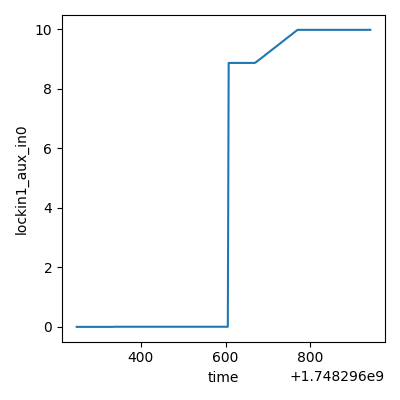

2025-05-26 18:02:21,796 [INFO] Completed in 0h 11m 34s
2025-05-26 18:02:21,796 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\22\data.tsv.gz


In [166]:
fieldw = sweep.Station(basedir = BGBSO1_2)

fieldw.fp(bfield)
fieldw.plot('time', bfield)

fieldw.add_comment("Field ramp for BGBSO1_2")

fieldw.watch(delay = 2)

In [167]:
bfield()

9.9781723022

2025-05-26 18:38:04,109 [INFO] Starting sweep with ID 23
2025-05-26 18:38:04,109 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

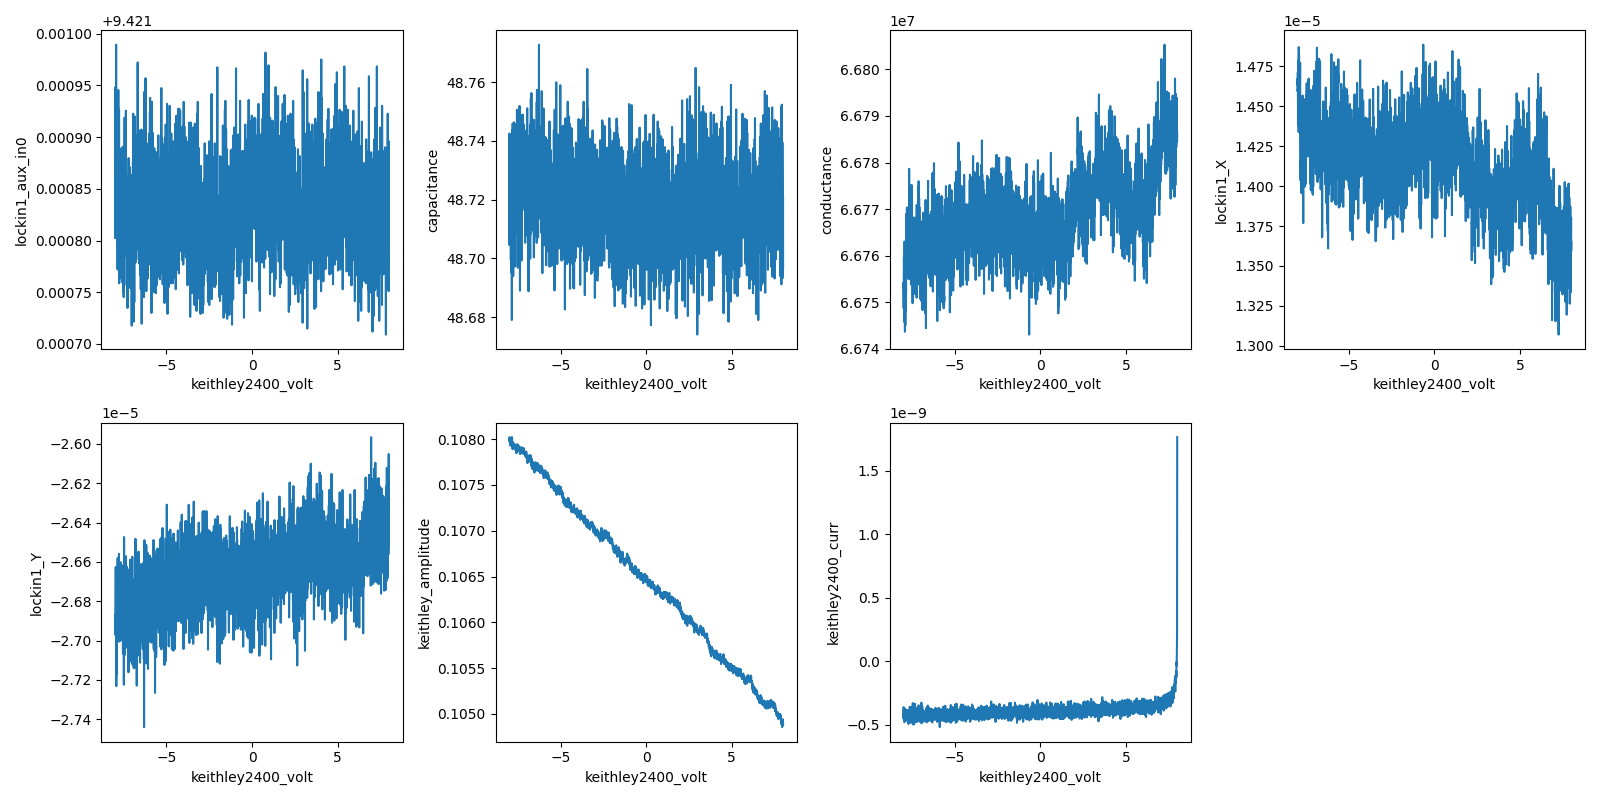

2025-05-26 18:58:00,816 [INFO] Completed in 0h 19m 55s
2025-05-26 18:58:00,816 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\23\data.tsv.gz
2025-05-26 19:07:18,074 [INFO] Starting sweep with ID 24
2025-05-26 19:07:18,074 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

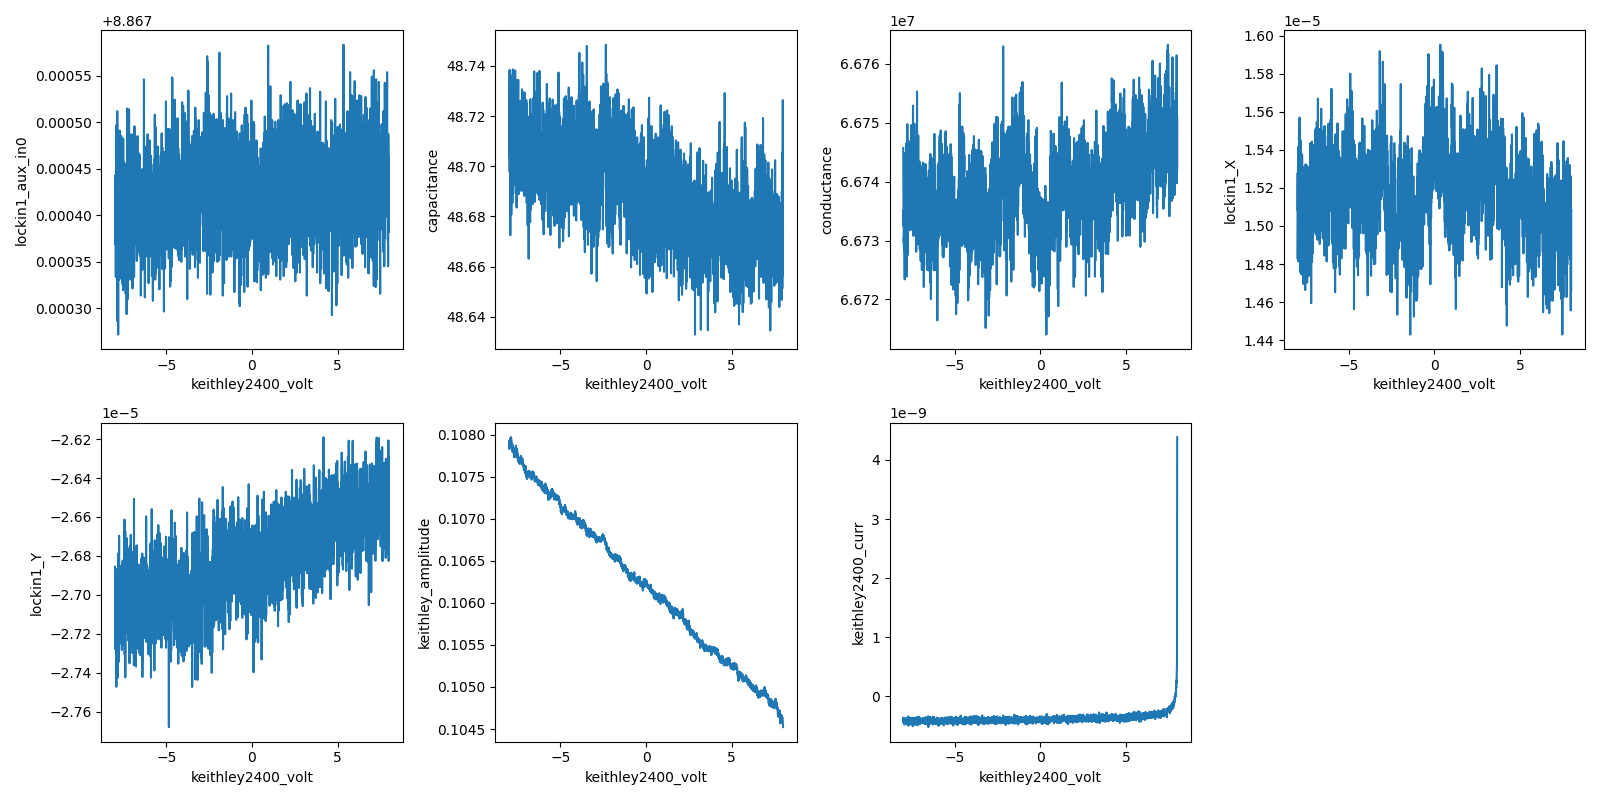

2025-05-26 19:27:15,458 [INFO] Completed in 0h 19m 56s
2025-05-26 19:27:15,458 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\24\data.tsv.gz
2025-05-26 19:39:25,056 [INFO] Starting sweep with ID 25
2025-05-26 19:39:25,056 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

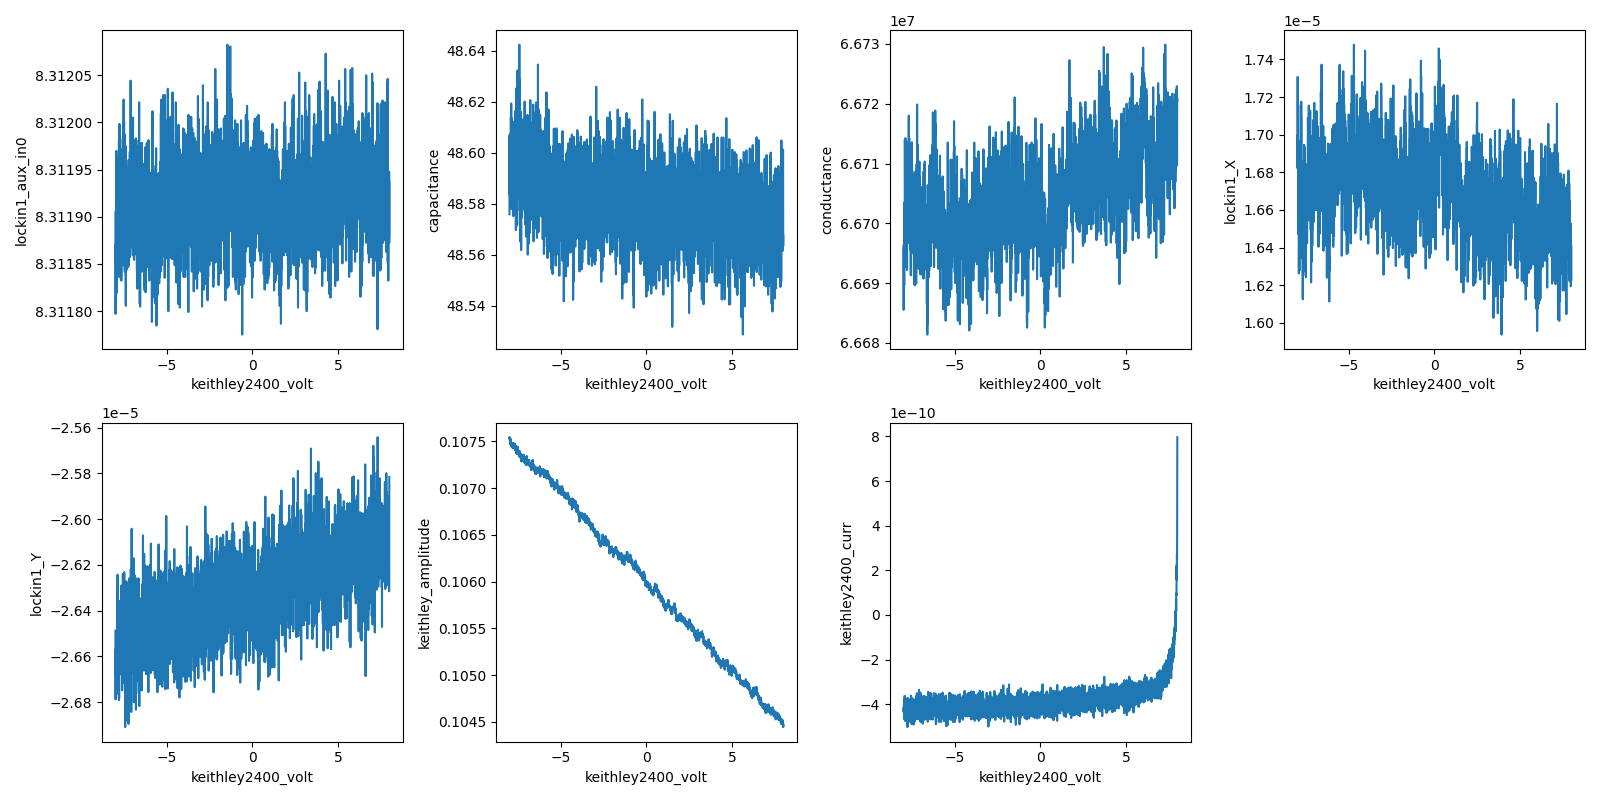

2025-05-26 19:59:22,026 [INFO] Completed in 0h 19m 56s
2025-05-26 19:59:22,026 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\25\data.tsv.gz
2025-05-26 20:11:30,357 [INFO] Starting sweep with ID 26
2025-05-26 20:11:30,358 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

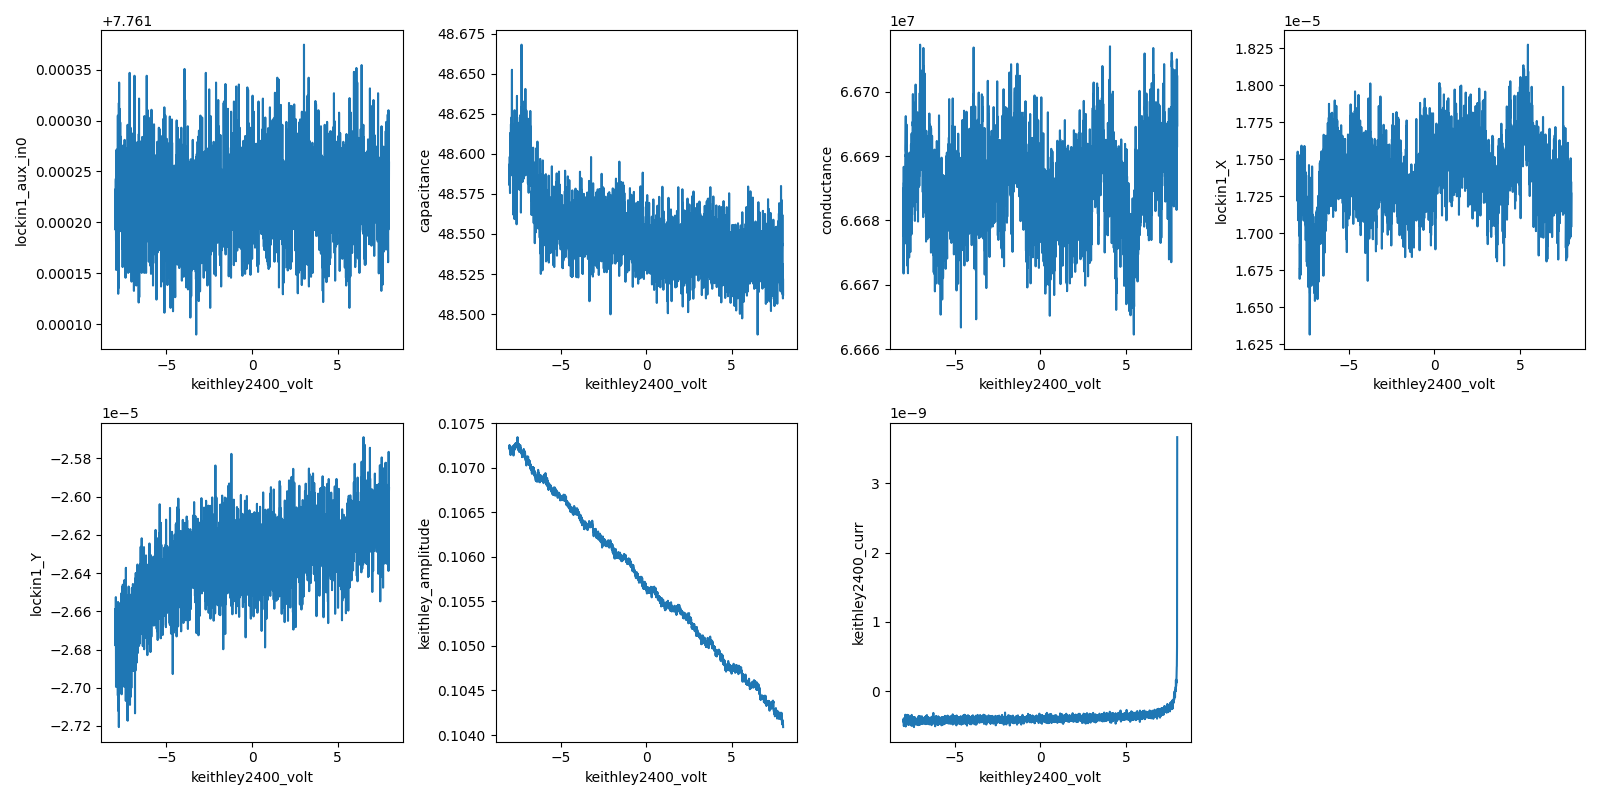

2025-05-26 20:31:26,967 [INFO] Completed in 0h 19m 55s
2025-05-26 20:31:26,967 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\26\data.tsv.gz
2025-05-26 20:43:35,149 [INFO] Starting sweep with ID 27
2025-05-26 20:43:35,149 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

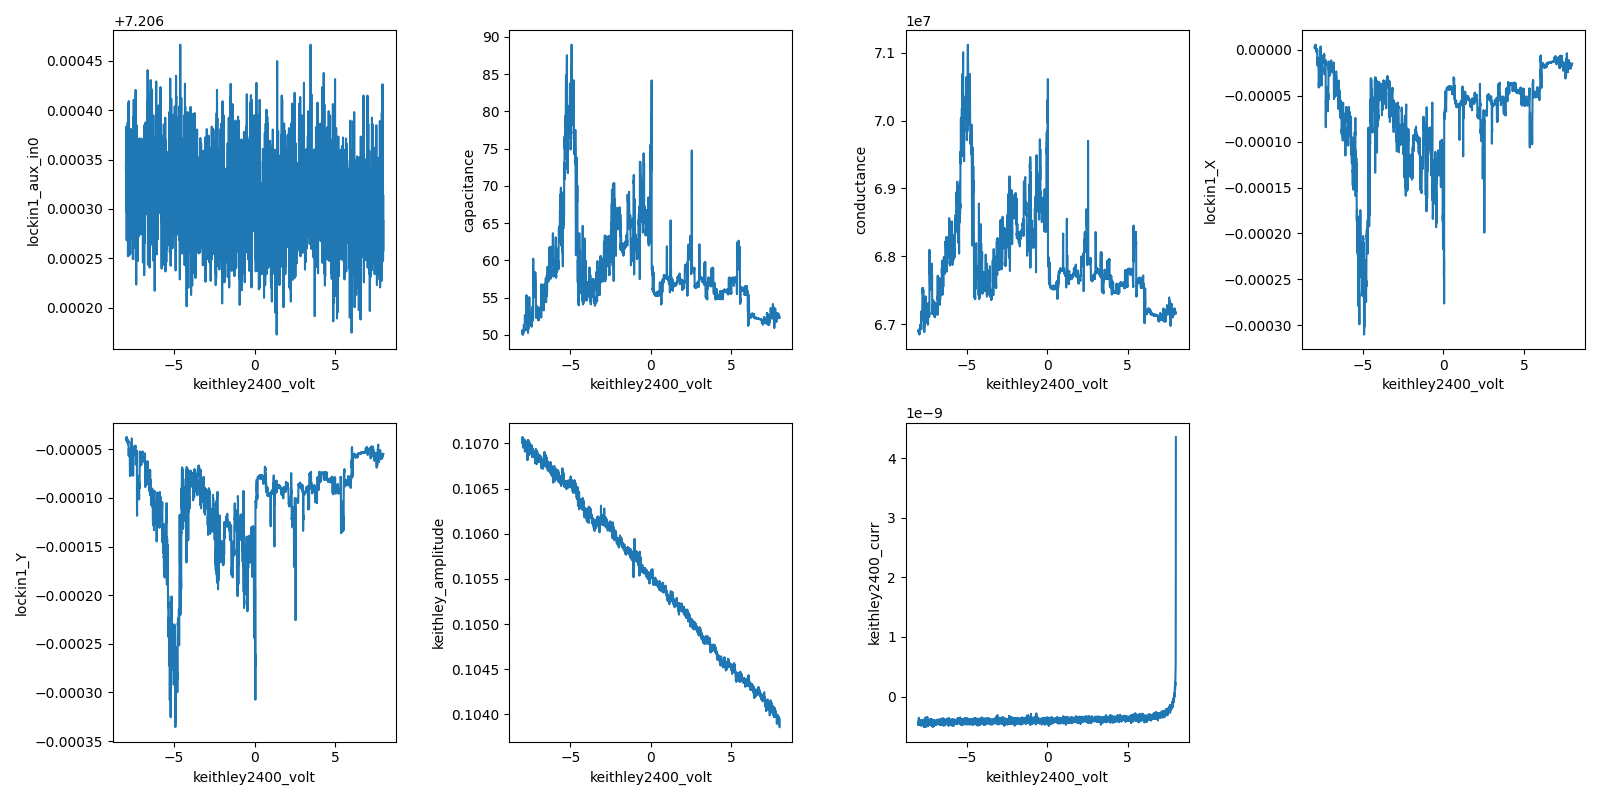

2025-05-26 21:03:24,253 [INFO] Completed in 0h 19m 48s
2025-05-26 21:03:24,253 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\27\data.tsv.gz
2025-05-26 21:15:08,114 [INFO] Starting sweep with ID 28
2025-05-26 21:15:08,121 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

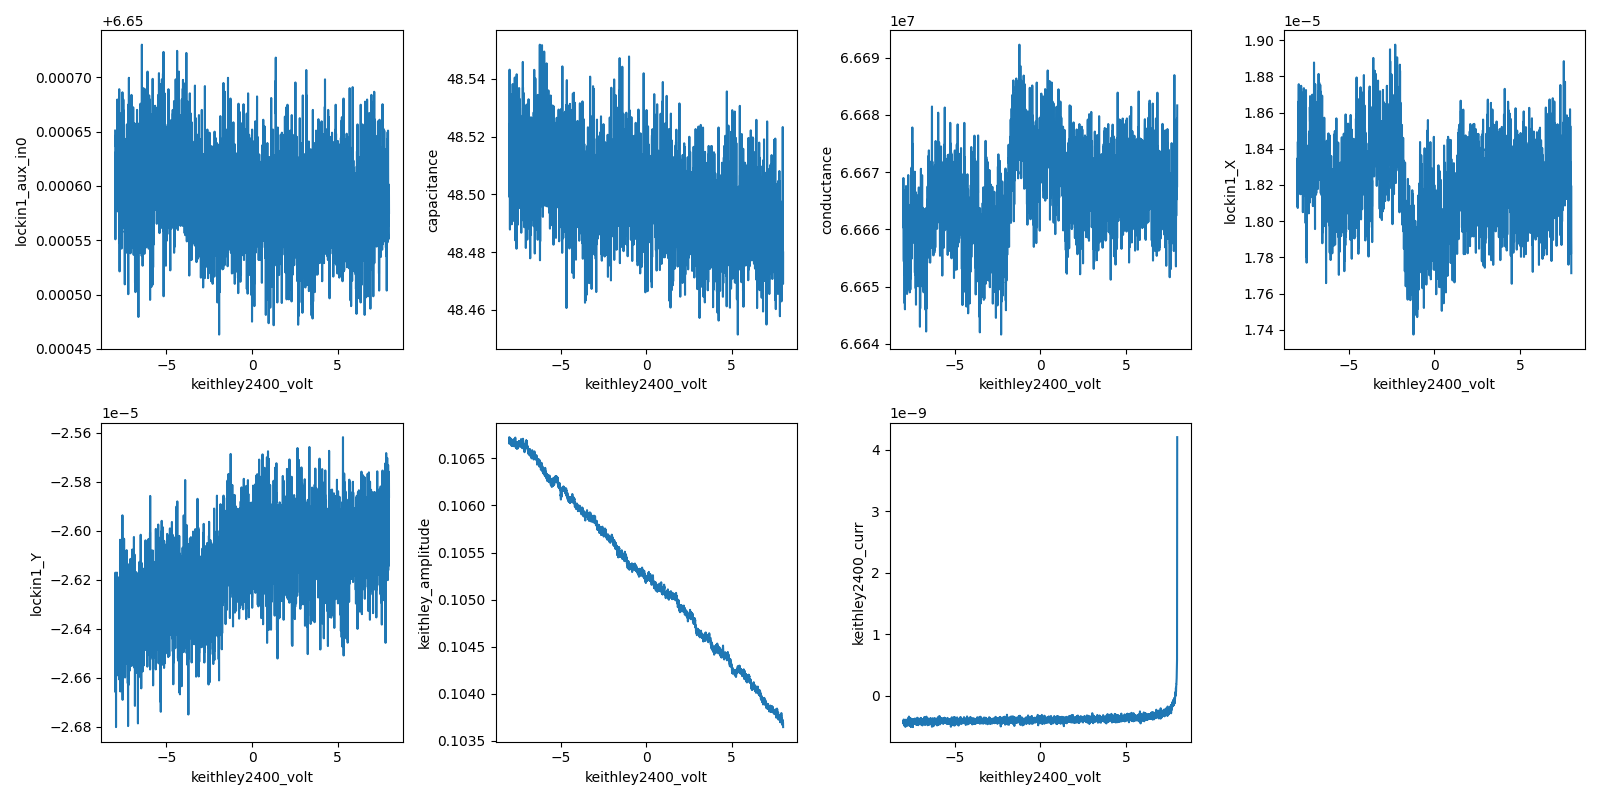

2025-05-26 21:35:06,405 [INFO] Completed in 0h 19m 57s
2025-05-26 21:35:06,405 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\28\data.tsv.gz
2025-05-26 21:47:10,083 [INFO] Starting sweep with ID 29
2025-05-26 21:47:10,083 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

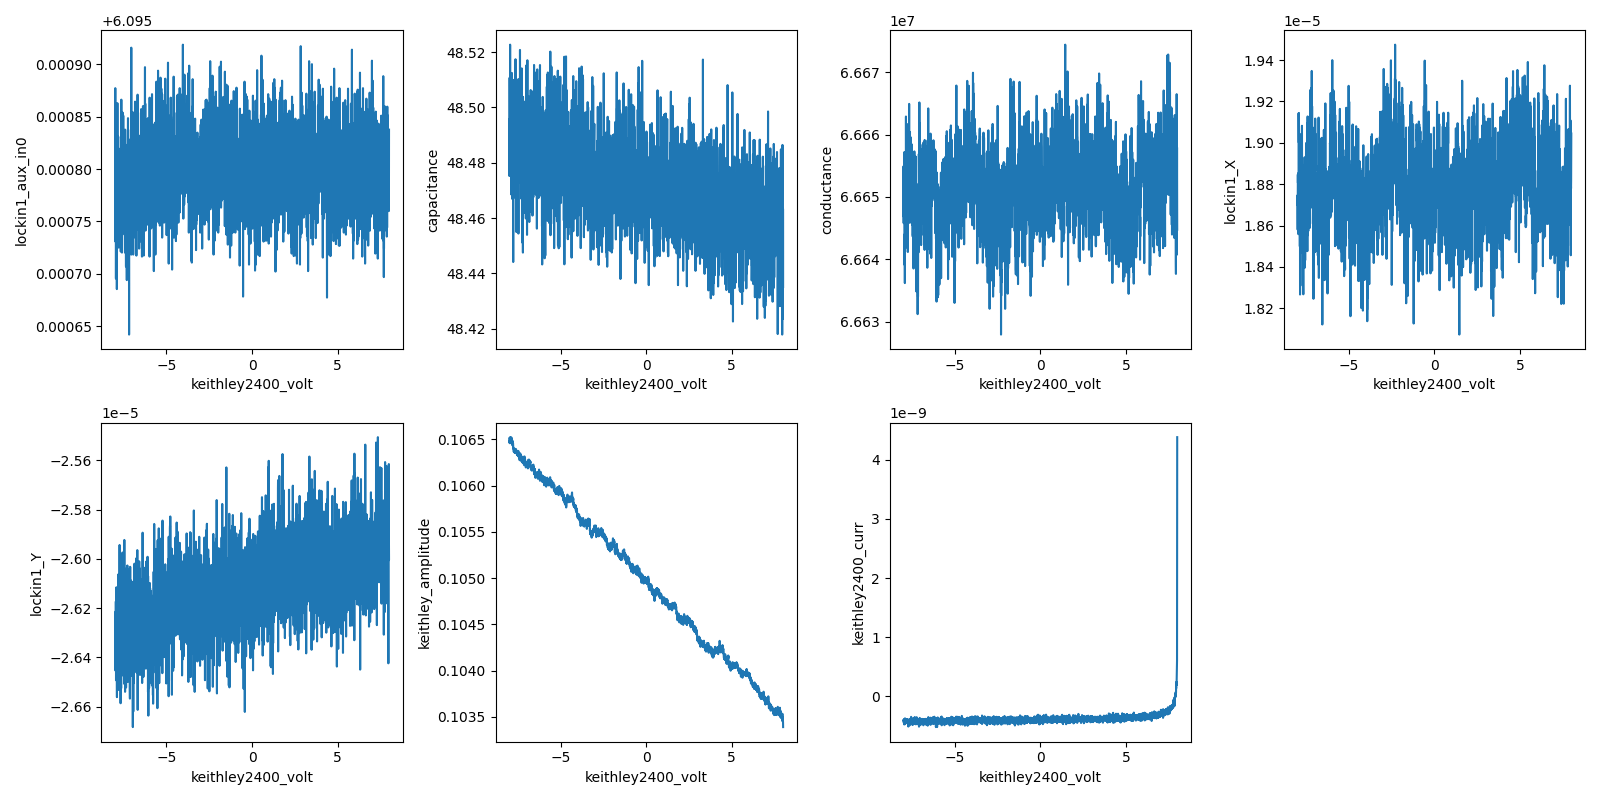

2025-05-26 22:07:07,299 [INFO] Completed in 0h 19m 56s
2025-05-26 22:07:07,299 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\29\data.tsv.gz
2025-05-26 22:19:10,625 [INFO] Starting sweep with ID 30
2025-05-26 22:19:10,625 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

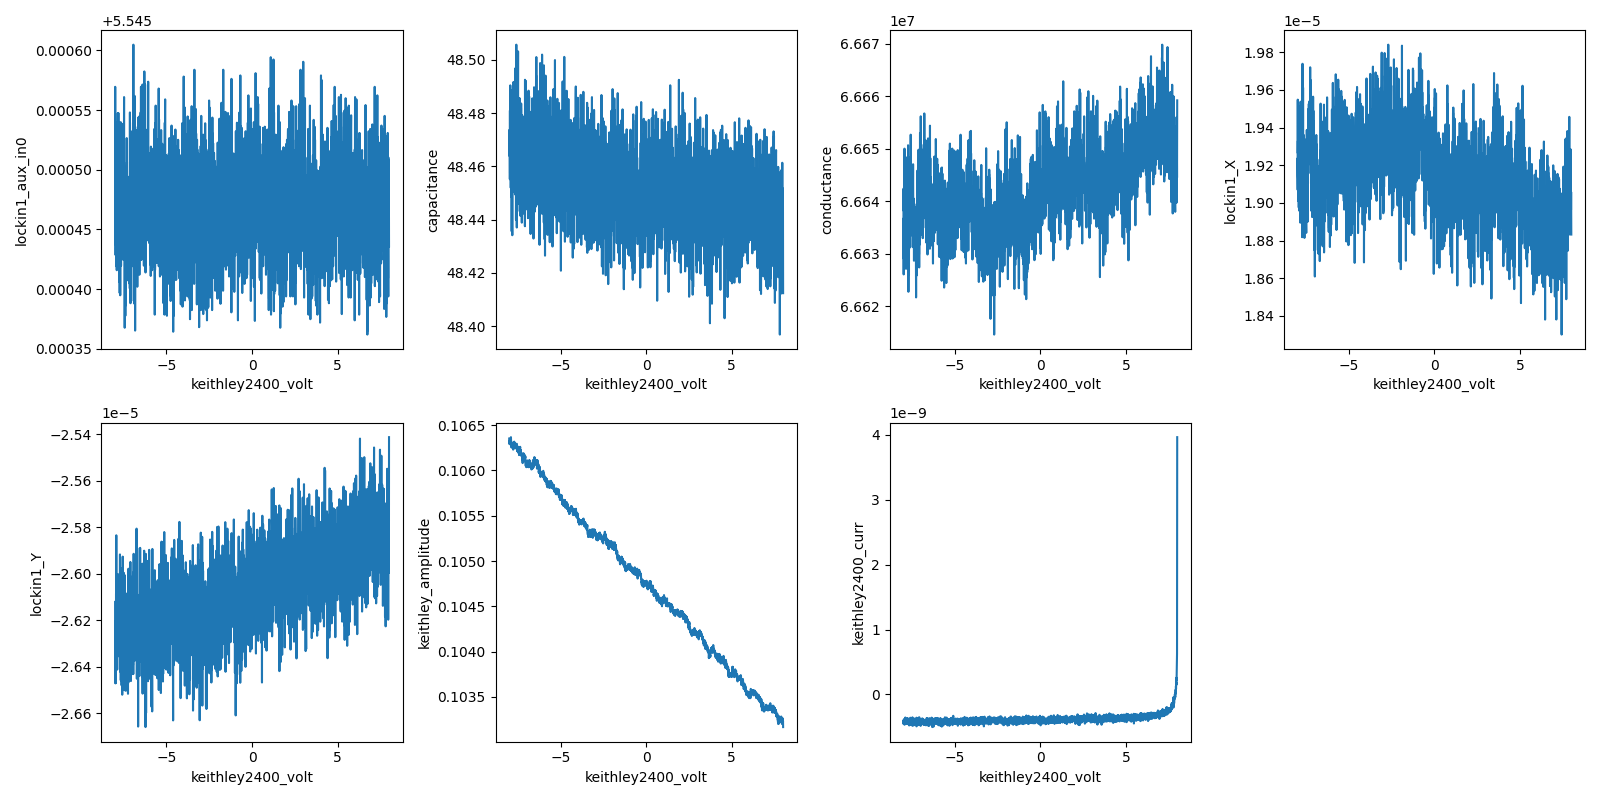

2025-05-26 22:39:07,379 [INFO] Completed in 0h 19m 56s
2025-05-26 22:39:07,379 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\30\data.tsv.gz
2025-05-26 22:51:10,482 [INFO] Starting sweep with ID 31
2025-05-26 22:51:10,482 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

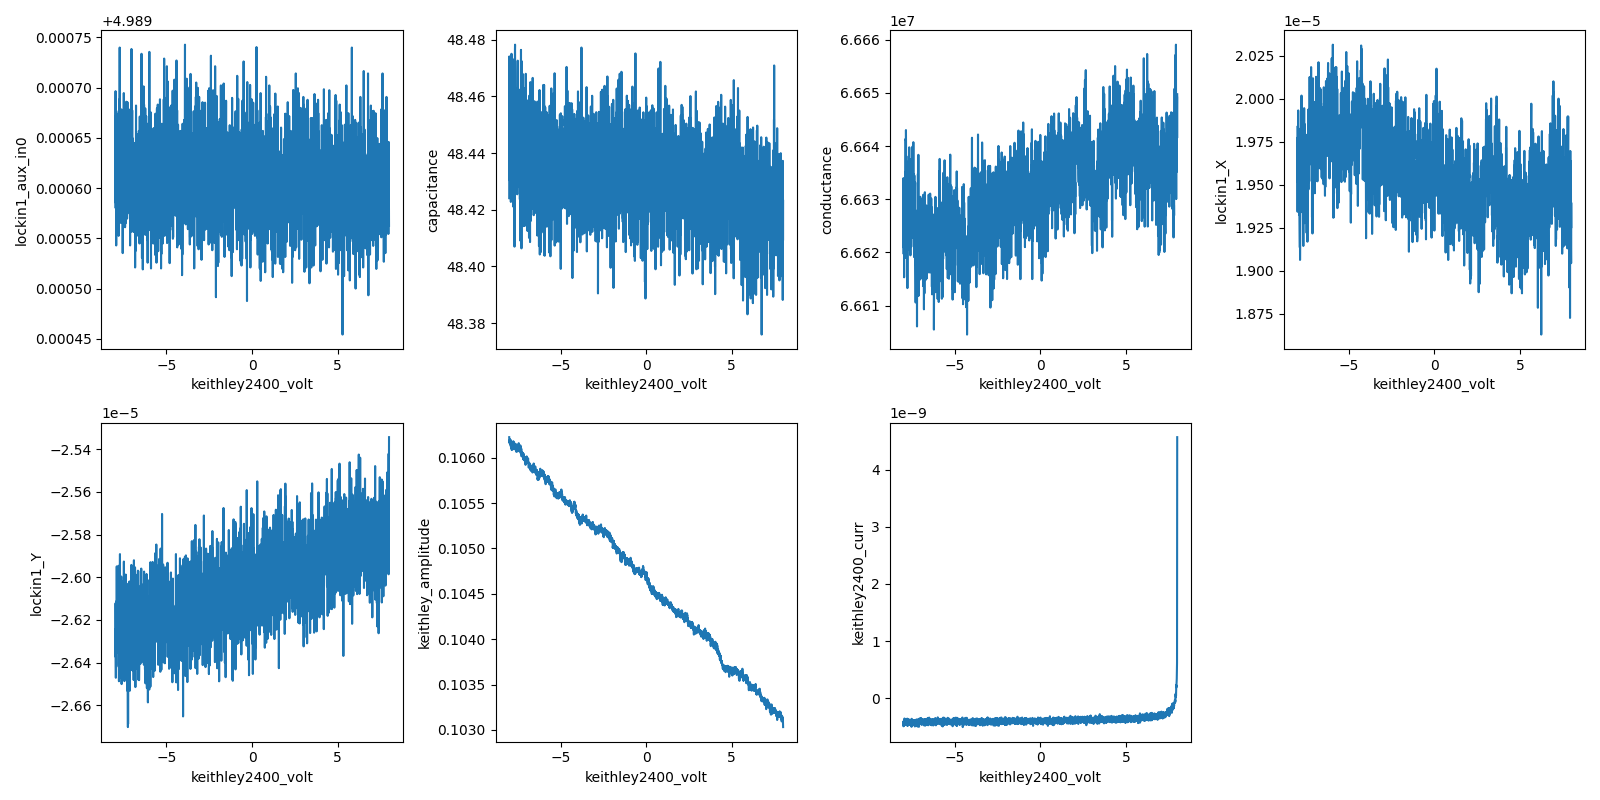

2025-05-26 23:11:08,687 [INFO] Completed in 0h 19m 57s
2025-05-26 23:11:08,689 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\31\data.tsv.gz
2025-05-26 23:23:08,474 [INFO] Starting sweep with ID 32
2025-05-26 23:23:08,474 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

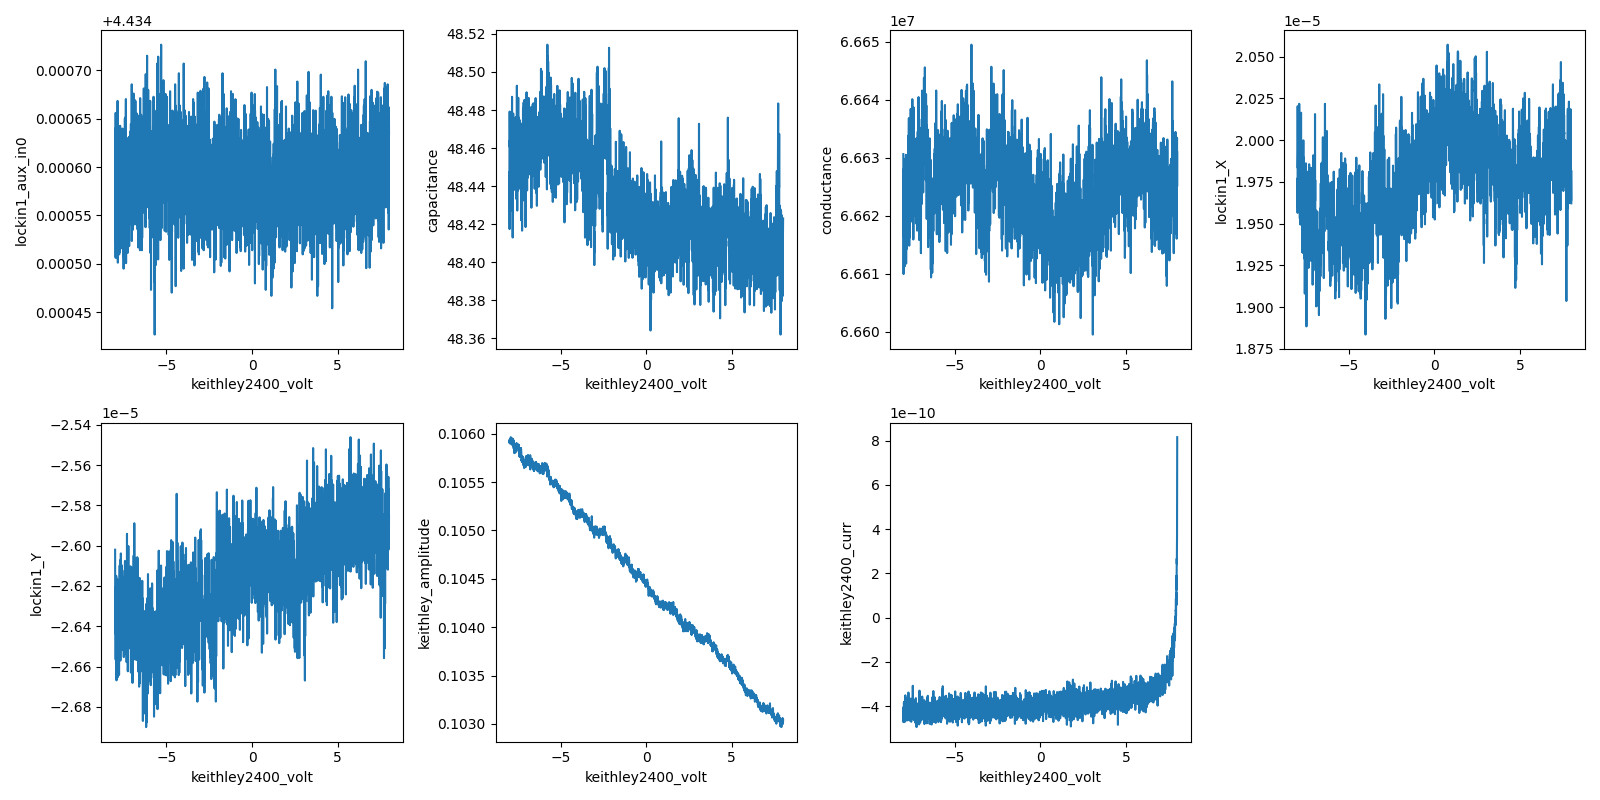

2025-05-26 23:43:06,860 [INFO] Completed in 0h 19m 57s
2025-05-26 23:43:06,860 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\32\data.tsv.gz
2025-05-26 23:55:05,752 [INFO] Starting sweep with ID 33
2025-05-26 23:55:05,752 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

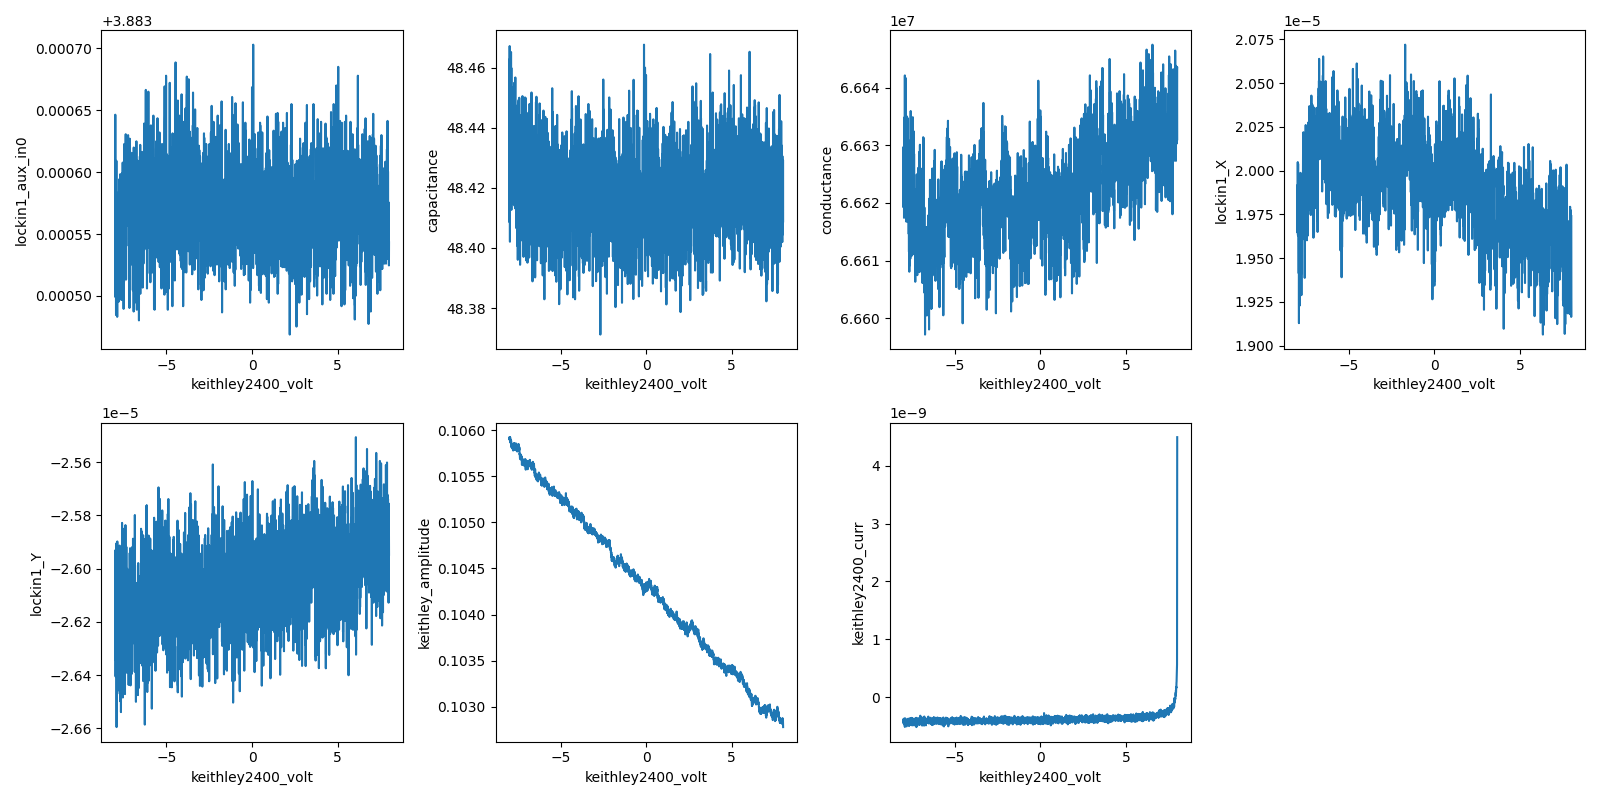

2025-05-27 00:15:04,045 [INFO] Completed in 0h 19m 57s
2025-05-27 00:15:04,045 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\33\data.tsv.gz
2025-05-27 00:27:01,058 [INFO] Starting sweep with ID 34
2025-05-27 00:27:01,058 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

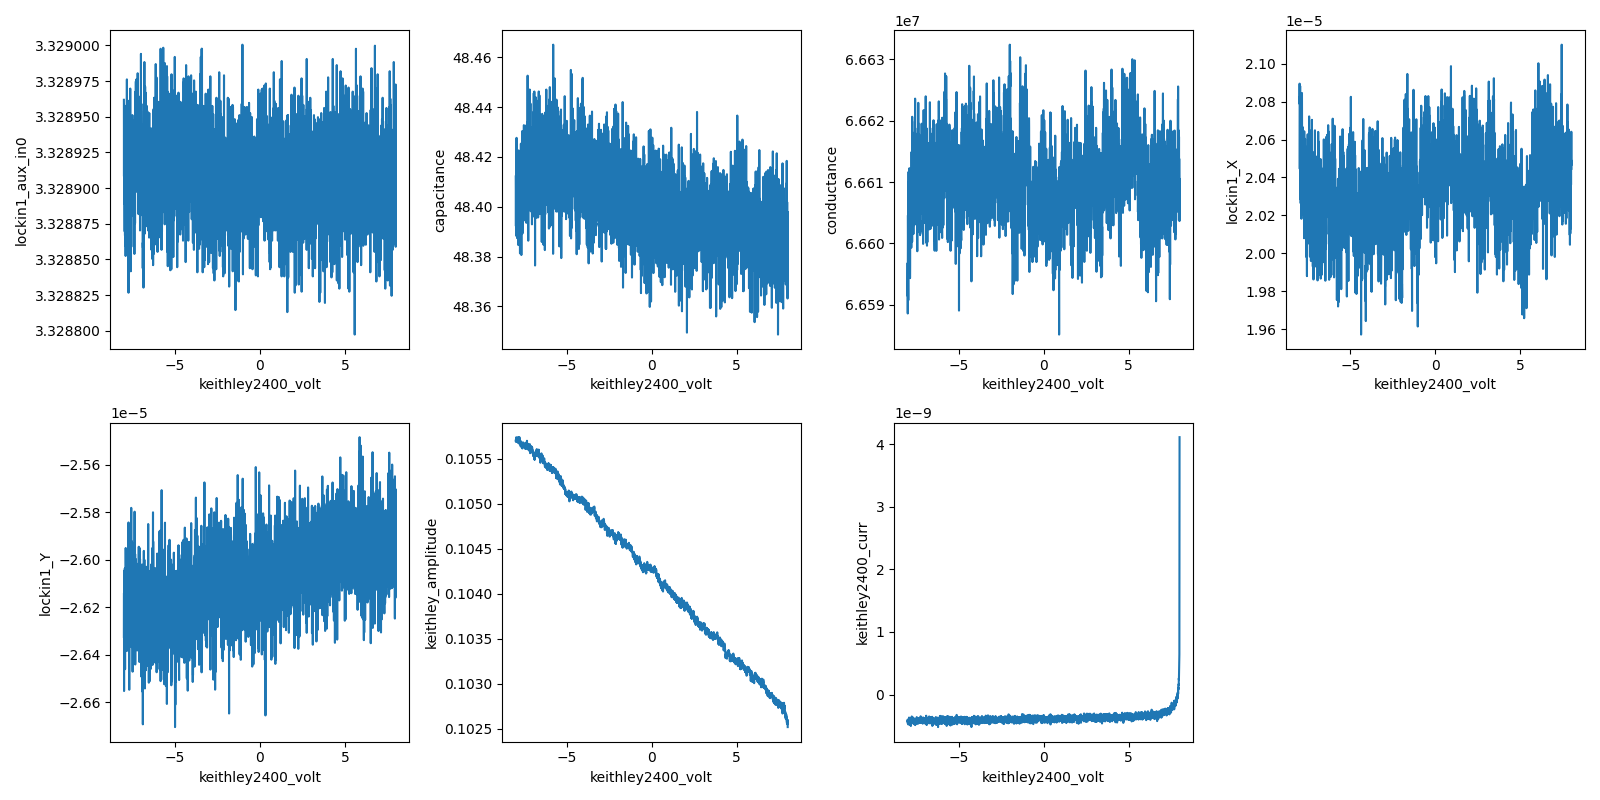

2025-05-27 00:47:00,249 [INFO] Completed in 0h 19m 58s
2025-05-27 00:47:00,249 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\34\data.tsv.gz
2025-05-27 00:58:55,621 [INFO] Starting sweep with ID 35
2025-05-27 00:58:55,621 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

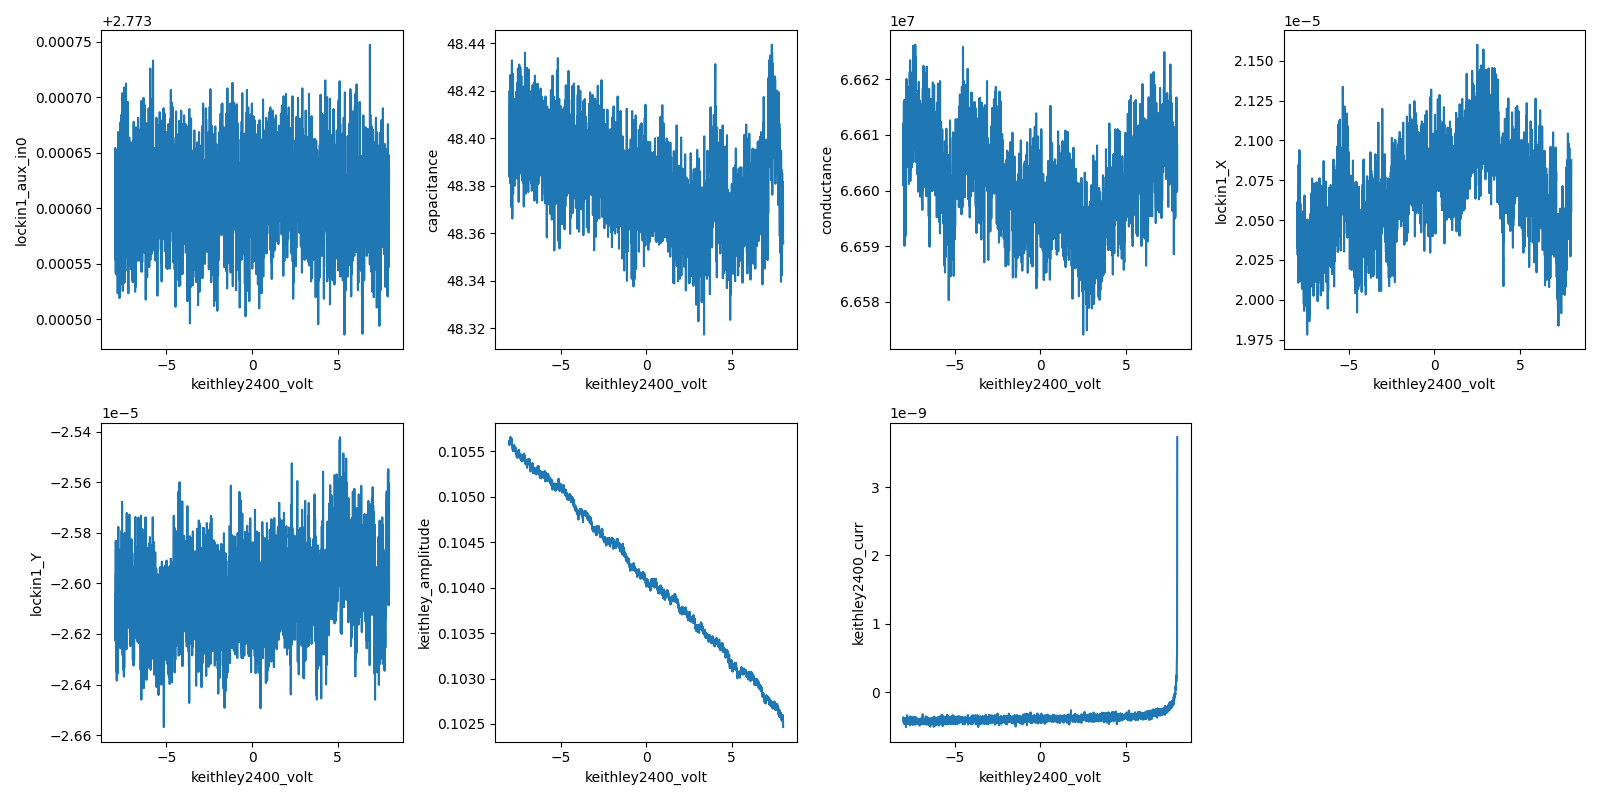

2025-05-27 01:18:54,268 [INFO] Completed in 0h 19m 57s
2025-05-27 01:18:54,268 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\35\data.tsv.gz
2025-05-27 01:30:46,592 [INFO] Starting sweep with ID 36
2025-05-27 01:30:46,592 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

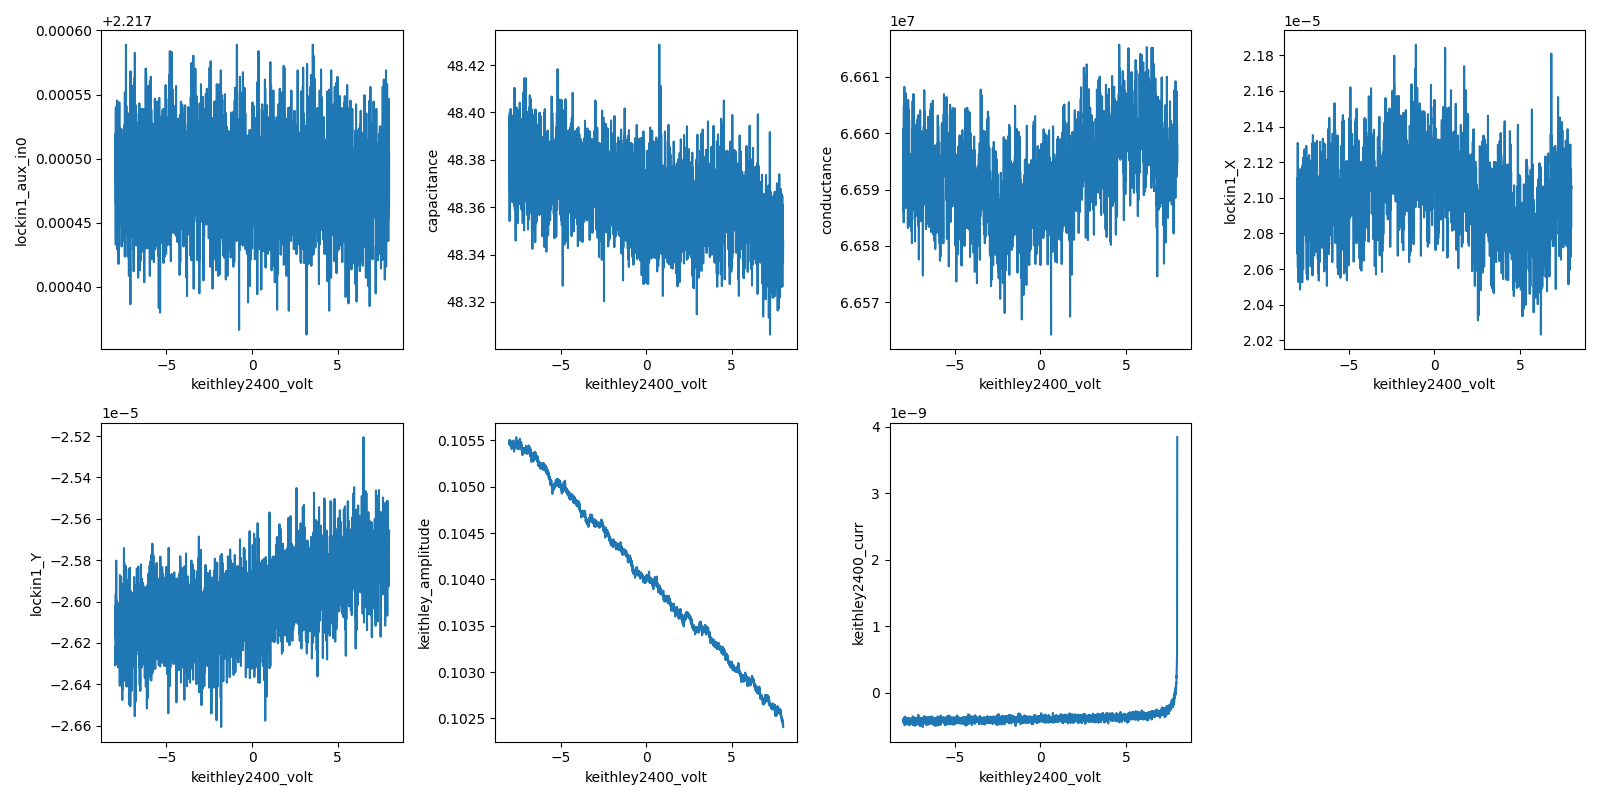

2025-05-27 01:50:44,873 [INFO] Completed in 0h 19m 57s
2025-05-27 01:50:44,873 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\36\data.tsv.gz
2025-05-27 02:02:36,430 [INFO] Starting sweep with ID 37
2025-05-27 02:02:36,430 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

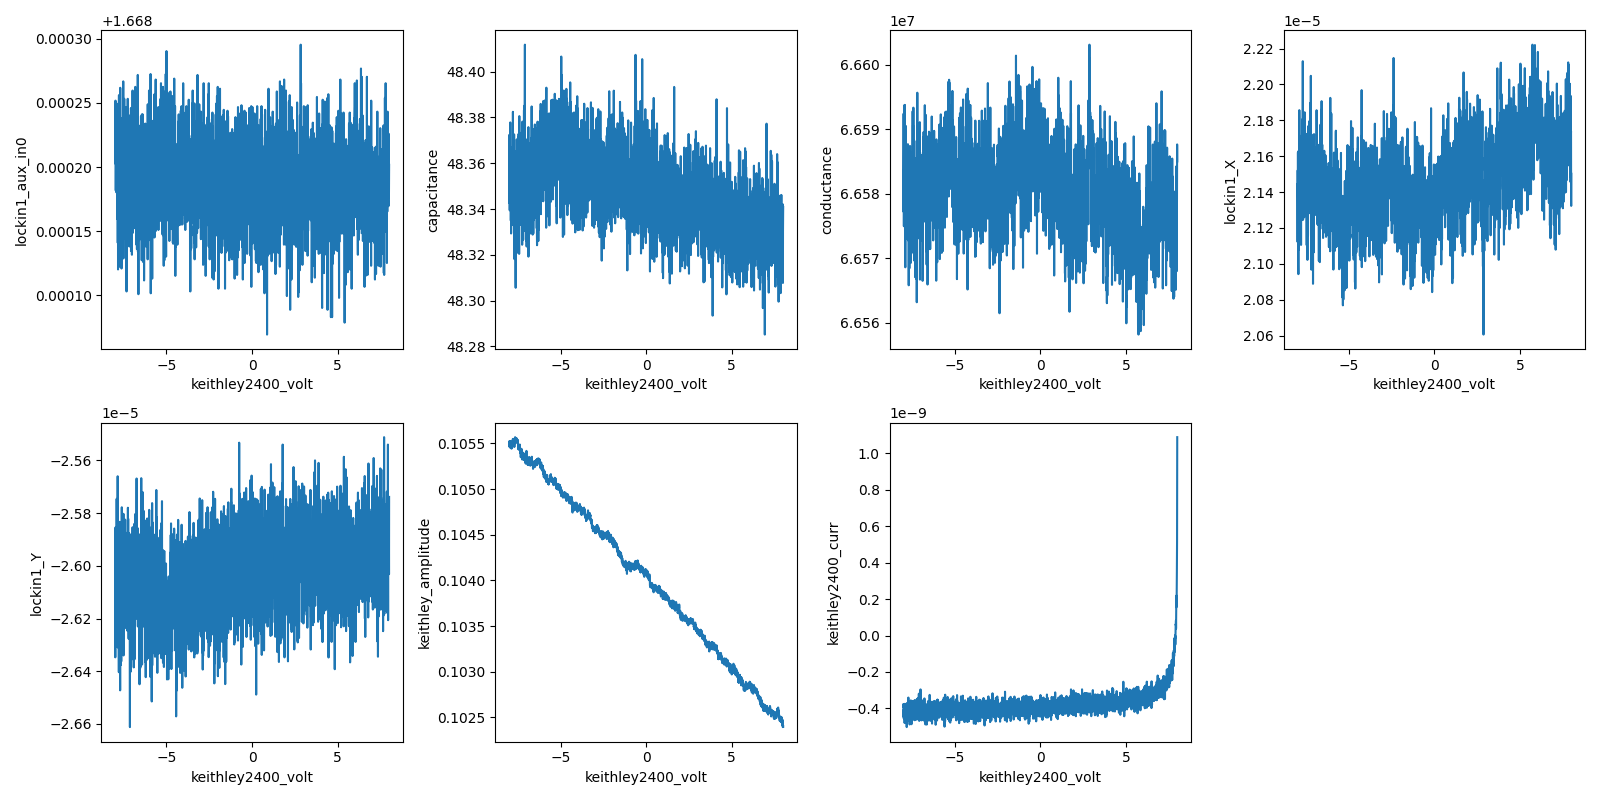

2025-05-27 02:22:36,381 [INFO] Completed in 0h 19m 59s
2025-05-27 02:22:36,381 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\37\data.tsv.gz
2025-05-27 02:34:23,961 [INFO] Starting sweep with ID 38
2025-05-27 02:34:23,961 [INFO] Minimum duration 0h 5m 0s


  0%|          | 0/3000 [00:00<?, ?it/s]

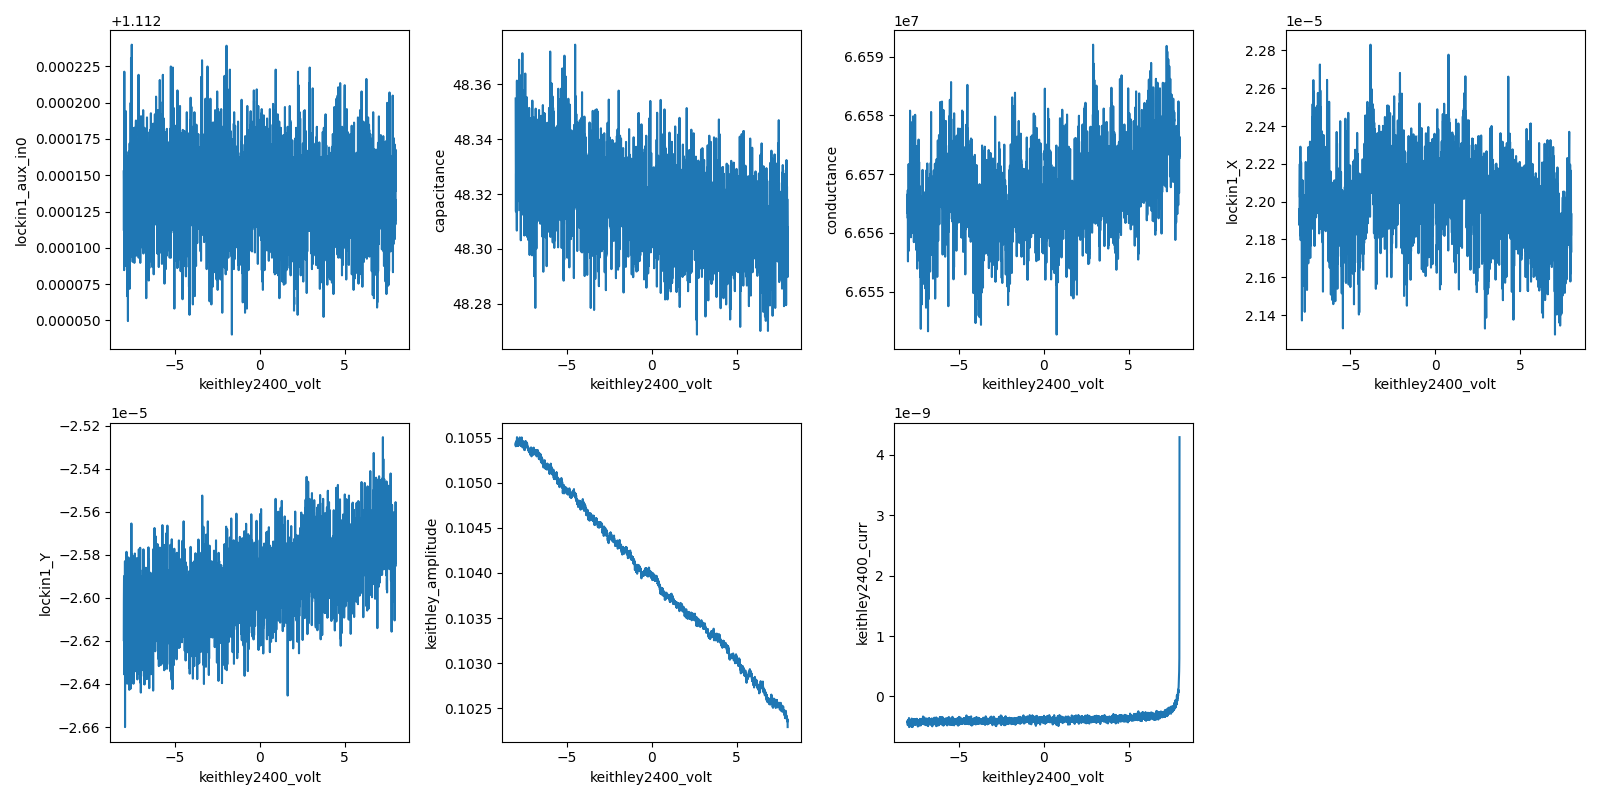

2025-05-27 02:54:21,827 [INFO] Completed in 0h 19m 57s
2025-05-27 02:54:21,827 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2\38\data.tsv.gz


: 

In [170]:
#4K temperature
bfieldsweep = sweep.Station(basedir = BGBSO1_2)

dep = [bfield, cap, cond, Vdsx, Vdsy, VdsDC, Igr]
indep = [Vgr]

for param in dep + indep:
    bfieldsweep.fp(param)

for param in dep:
    bfieldsweep.plot(Vgr, param)

done8_5T = False
done8T = False
done7_5T = False
done7T = False
done6_5T = False
done6T = False
done5_5T = False
done5T = False
done4_5T = False
done4T = False
done3_5T = False
done3T = False
done2_5T = False
done2T = False
done1_5T = False
done1T = False
done0_5T = False
done0T = False

while done8_5T == False:
    if np.abs(bfield() - 10*8.5/9) < 0.1:
        bfieldsweep.add_comment("8.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done8_5T = True

while done8T == False:
    if np.abs(bfield() - 10*8/9) < 0.1:
        bfieldsweep.add_comment("8T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done8T = True

while done7_5T == False:
    if np.abs(bfield() - 10*7.5/9) < 0.1:
        bfieldsweep.add_comment("7.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done7_5T = True

while done7T == False:
    if np.abs(bfield() - 10*7/9) < 0.1:
        bfieldsweep.add_comment("7T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done7T = True

while done6_5T == False:
    if np.abs(bfield() - 10*6.5/9) < 0.1:
        bfieldsweep.add_comment("6.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done6_5T = True

while done6T == False:
    if np.abs(bfield() - 10*6/9) < 0.1:
        bfieldsweep.add_comment("6T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done6T = True

while done5_5T == False:
    if np.abs(bfield() - 10*5.5/9) < 0.1:
        bfieldsweep.add_comment("5.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done5_5T = True

while done5T == False:
    if np.abs(bfield() - 10*5/9) < 0.1:
        bfieldsweep.add_comment("5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done5T = True

while done4_5T == False:
    if np.abs(bfield() - 10*4.5/9) < 0.1:
        bfieldsweep.add_comment("4.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done4_5T = True

while done4T == False:
    if np.abs(bfield() - 10*4/9) < 0.1:
        bfieldsweep.add_comment("4T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done4T = True

while done3_5T == False: 
    if np.abs(bfield() - 10*3.5/9) < 0.1:
        bfieldsweep.add_comment("3.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done3_5T = True

while done3T == False:
    if np.abs(bfield() - 10*3/9) < 0.1:
        bfieldsweep.add_comment("3T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done3T = True

while done2_5T == False: 
    if np.abs(bfield() - 10*2.5/9) < 0.1:
        bfieldsweep.add_comment("2.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done2_5T = True

while done2T == False:
    if np.abs(bfield() - 10*2/9) < 0.1:
        bfieldsweep.add_comment("2T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done2T = True

while done1_5T == False:
    if np.abs(bfield() - 10*1.5/9) < 0.1:
        bfieldsweep.add_comment("1.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done1_5T = True

while done1T == False:
    if np.abs(bfield() - 10*1/9) < 0.1:
        bfieldsweep.add_comment("1T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done1T = True

while done0_5T == False:
    if np.abs(bfield() - 10*0.5/9) < 0.1:
        bfieldsweep.add_comment("0.5T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done0_5T = True

while done0T == False:
    if np.abs(bfield() - 10*0/9) < 0.1:
        bfieldsweep.add_comment("0T sweep")
        paramp(Vgr, 8, 400)
        bfieldsweep.sweep(Vgr, np.linspace(8,-8,3000), delay = 0.1)
        done0T = True

In [4]:
from cappy.opener import Opener

for index in range(0,16):
    Bfield = 0.5*(15 - index) + 1 
    opened = Opener(BGBSO1_2, index+23)
    data = opened.getdata()
    capdata = data["capacitance"]
    condata = data["conductance"]
    Vgrdata = data["keithley2400_volt"] 

    
    
#     plt.scatter(Bfield*np.ones(len(Vgrdata[avgwindow:-avgwindow])), Vgrdata[avgwindow:-avgwindow], c = capdata[avgwindow:-avgwindow])
# plt.title("Capacitance Vs B Field and Graphene Voltage")
# plt.xlabel("B field (T)")
# plt.ylabel("Gate Voltage (V)")
# plt.show()
    
    plt.scatter(Bfield*np.ones(len(Vgrdata[avgwindow:-avgwindow])) , Vgrdata[avgwindow:-avgwindow], c = condata[avgwindow:-avgwindow])
plt.xlabel("B field (T)")
plt.title("Conductance Vs B Field and Graphene Voltage")
plt.ylabel("Gate Voltage (V)")
plt.show()


C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 23

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'lockin1_aux_in0', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])

C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 24

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'lockin1_aux_in0', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])

C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 25

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'keithley2400_volt', 'lockin1_aux_in0', 'capacitance', 'conductance', 'lockin1_X', 'lockin1_Y', 'keithley_amplitude', 'keithley2400_curr'])

C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\BGBSO1_2 26